# **Table Of Contents**


1. [Import Libraries](#import-libraries)
2. [Query SQL](#query-sql)
3. [Data Loading](#data-loading)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
    - [Split Train-Test](#split-train-test)
    - [Missing Value](#missing-value)
    - [Outlier Handling](#outlier-handling)
    - [Feature Selection](#feature-selection)
    - [Feature Encoding](#feature-encoding)
    - [Feature Scaling](#feature-scaling)
6. [Model Definition](#model-definition)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Model Saving](#model-saving)



---

## <a id="import-libraries">**1. Import Libraries**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4911/4911643.png" alt="drawing" width="64" align="center"/></a>

---

In [ ]:
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Library Machine Learning Model
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Library Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Library Outlier Handling
from feature_engine.outliers import Winsorizer
# Library Correlation
from scipy.stats import kendalltau, spearmanr


# Model Evaluation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")


---

## <a id="import-libraries">**2. Query SQL**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4911/4911643.png" alt="drawing" width="64" align="center"/></a>

---

mengambil dataset dari BigQuery 

```python
from google.colab import auth
from google.cloud import bigquery

# Authenticate the user
auth.authenticate_user()
print('Authenticated')

# Set up the BigQuery client
project_id = "the-condition-424301-m6"
client = bigquery.Client(project=project_id)

# Define the query with the specified conversions and limit
query = '''
SELECT 
    limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 33983  --  Batch 17 dan lahir tahun 1999, 17 x 1999 = 33983.
'''

# Execute the query and convert the result to a pandas DataFrame
df = client.query(query).to_dataframe()

# Save the DataFrame to a CSV file
csv_filename = 'P1G5_Set_1_vicky_belario.csv'
df.to_csv(csv_filename, index=False)





---

## <a id="data-loading">**3. Data Loading**</a> <a style="float:right; margin-right: 15px"><img src="https://icons.veryicon.com/png/128/business/commercial-plain-blue-collection/wd-accent-data-clock.png" alt="drawing" width="64" align="center"/></a>

---

In [2]:
# Membaca data dari file CSV
df = pd.read_csv("P1G5_Set_1_vicky_belario.csv")


In [3]:
# Membuat salinan dari dataframe df dengan nama df_copy
df_copy = df.copy()



In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Menampilkan lima baris pertama dari DataFrame
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


diketahui dari dataset variabel kategorikalnya sudah dalam bentuk encoding

In [6]:
# Menampilkan informasi umum tentang DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [7]:
# Menampilkan statistik deskriptif dari DataFrame
print(df.describe())

       limit_balance          sex  education_level  marital_status  \
count    2965.000000  2965.000000      2965.000000     2965.000000   
mean   163369.308600     1.607757         1.849578        1.559865   
std    125030.415472     0.488333         0.778184        0.522317   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2965.000000  2965.000000  2965.000000  2965.000000  2965.000000   
mean     35.193255     0.005059    -0.122428    -0.141653    -0.185160   
std       9.109439     1.114395     1.180784     1.183630     1.178322   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   

In [8]:
# Menampilkan jumlah nilai kosong (null) dalam setiap kolom DataFrame
print(df.isnull().sum())

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64


In [9]:
# Menampilkan jumlah baris duplikat dalam DataFrame
print(df.duplicated().sum())


1


In [10]:
# Menghapus baris-baris duplikat dari dataframe df
df = df.drop_duplicates()

In [11]:
# Menghitung persentase nilai kosong (null) dalam setiap kolom DataFrame
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

limit_balance                 0.0
sex                           0.0
education_level               0.0
marital_status                0.0
age                           0.0
pay_0                         0.0
pay_2                         0.0
pay_3                         0.0
pay_4                         0.0
pay_5                         0.0
pay_6                         0.0
bill_amt_1                    0.0
bill_amt_2                    0.0
bill_amt_3                    0.0
bill_amt_4                    0.0
bill_amt_5                    0.0
bill_amt_6                    0.0
pay_amt_1                     0.0
pay_amt_2                     0.0
pay_amt_3                     0.0
pay_amt_4                     0.0
pay_amt_5                     0.0
pay_amt_6                     0.0
default_payment_next_month    0.0
dtype: float64


diketahui persentase missing value di dataset adalah 0

In [12]:
for column in df.columns:
    print('Number of unique value in the variable {:<25}: {}'.format(column, len(df[column].unique())))


Number of unique value in the variable limit_balance            : 59
Number of unique value in the variable sex                      : 2
Number of unique value in the variable education_level          : 7
Number of unique value in the variable marital_status           : 4
Number of unique value in the variable age                      : 49
Number of unique value in the variable pay_0                    : 11
Number of unique value in the variable pay_2                    : 10
Number of unique value in the variable pay_3                    : 9
Number of unique value in the variable pay_4                    : 10
Number of unique value in the variable pay_5                    : 9
Number of unique value in the variable pay_6                    : 8
Number of unique value in the variable bill_amt_1               : 2643
Number of unique value in the variable bill_amt_2               : 2592
Number of unique value in the variable bill_amt_3               : 2549
Number of unique value in the vari

diketahui bahwa kolom atau variabel yang memiliki unique value sediki atau dibawah 20 termasuk variabel kategorikal. sisanya yang unique value nya banyak adalah variabel numerik


---

## <a id="exploratory-data-analysis">**4. Exploratory Data Analysis (EDA)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/272/272369.png" alt="drawing" width="64" align="center"/></a>

---

sebelum ke EDA perlu diketahui apa saja variabel dalam kolom dan nilai yang dipresentasikan dari tabel tersebut 
berikut adalah  
-   limit_balance                  ->  Limit Saldo Kredit (NT Dollar)
-   sex                            ->  Jenis Kelamin (1=laki-laki, 2=perempuan)
-   education_level   ->  Tingkat Pendidikan (1=sekolah pascasarjana, 2=universitas, 3=sekolah menengah, 4=lainnya, 5=belum diketahui, 6=belum diketahui)
-   marital_status                 ->  Status Pernikahan (1=menikah, 2=lajang, 3=lainnya)
-   age                            ->  Usia (tahun)
-   pay_0                     ->  Status Pembayaran September 2005 (-1=tepat waktu, 1=terlambat bayar 1 bulan, ..., 9=terlambat bayar 9 bulan atau lebih)
-   pay_2                          ->  Status Pembayaran Agustus 2005 (skala sama seperti di atas)
-   pay_3                          ->  Status Pembayaran Juli 2005 (skala sama seperti di atas)
-   pay_4                          ->  Status Pembayaran Juni 2005 (skala sama seperti di atas)
-  pay_5                          ->  Status Pembayaran Mei 2005 (skala sama seperti di atas)
-  pay_6                          ->  Status Pembayaran April 2005 (skala sama seperti di atas)
-  bill_amt_1                     ->  Jumlah Tagihan September 2005 (NT Dollar)
-  bill_amt_2                     ->  Jumlah Tagihan Agustus 2005 (NT Dollar)
-  bill_amt_3                     ->  Jumlah Tagihan Juli 2005 (NT Dollar)
-  bill_amt_4                     ->  Jumlah Tagihan Juni 2005 (NT Dollar)
-  bill_amt_5                     ->  Jumlah Tagihan Mei 2005 (NT Dollar)
-  bill_amt_6                     ->  Jumlah Tagihan April 2005 (NT Dollar)
-  pay_amt_1                      ->  Jumlah Pembayaran Sebelumnya September 2005 (NT Dollar)
-  pay_amt_2                      ->  Jumlah Pembayaran Sebelumnya Agustus 2005 (NT Dollar)
-  pay_amt_3                      ->  Jumlah Pembayaran Sebelumnya Juli 2005 (NT Dollar)
-  pay_amt_4                      ->  Jumlah Pembayaran Sebelumnya Juni 2005 (NT Dollar)
-  pay_amt_5                      ->  Jumlah Pembayaran Sebelumnya Mei 2005 (NT Dollar)
-  pay_amt_6                      ->  Jumlah Pembayaran Sebelumnya April 2005 (NT Dollar)
-  default_payment_next_month     ->  Pembayaran Default Bulan Depan (1=ya, 0=tidak)


berdasarkan dataset yang didapat:

Kelas Positif (1): Yes (akan gagal bayar bulan depan)<br>
Kelas Negatif (0): No (tidak akan gagal bayar bulan depan)

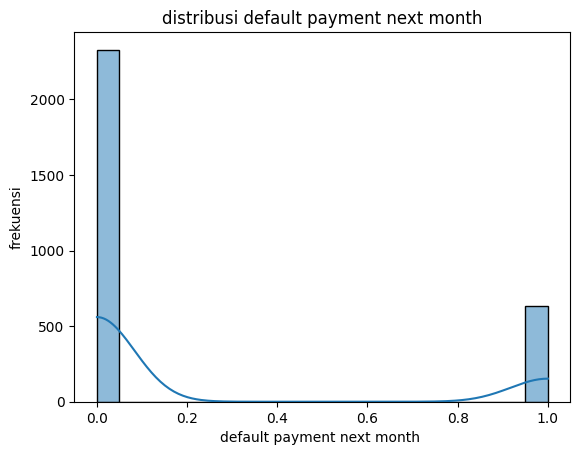

In [13]:

# Plot histogram distribusi harga menggunakan seaborn
sns.histplot(df['default_payment_next_month'], bins=20, kde=True)  # Membuat histogram dengan 20 bins dan menambahkan garis KDE
plt.title('distribusi default payment next month')  # Judul plot
plt.xlabel('default payment next month ')  # Label sumbu X
plt.ylabel('frekuensi')  # Label sumbu Y
plt.show()  # Menampilkan plot

- variabel payment next month disini merupakan orang gagal melakukan pembayaran bulan berikutnya
- pada histogram menunjukkan bahwa sebagian besar distribusinya berada di 0 yang berarti lebih banyak orang yang berhasil bayar dibanding orang yang gagal bayar. <br>
- distribusi orang yang berhasil bayar diatas 2000
- distribusi orang yang gagal bayar diatas 500
- plot histogram menunjukan data inbalances.

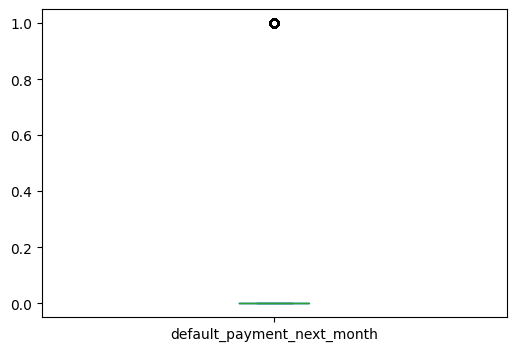

In [14]:
# Membuat subplot dengan satu kolom dan ukuran gambar 
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

# Membuat boxplot untuk harga
df['default_payment_next_month'].plot(kind='box', ax=ax)

# Menampilkan plot
plt.show()

- Dari box plot variabel default_payment_next_month, dapat dilihat bahwa distribusi data kebanyakan berkumpul di 1.0 <br> 
- Box plot menunjukkan bahwa data inbalances. <br> 

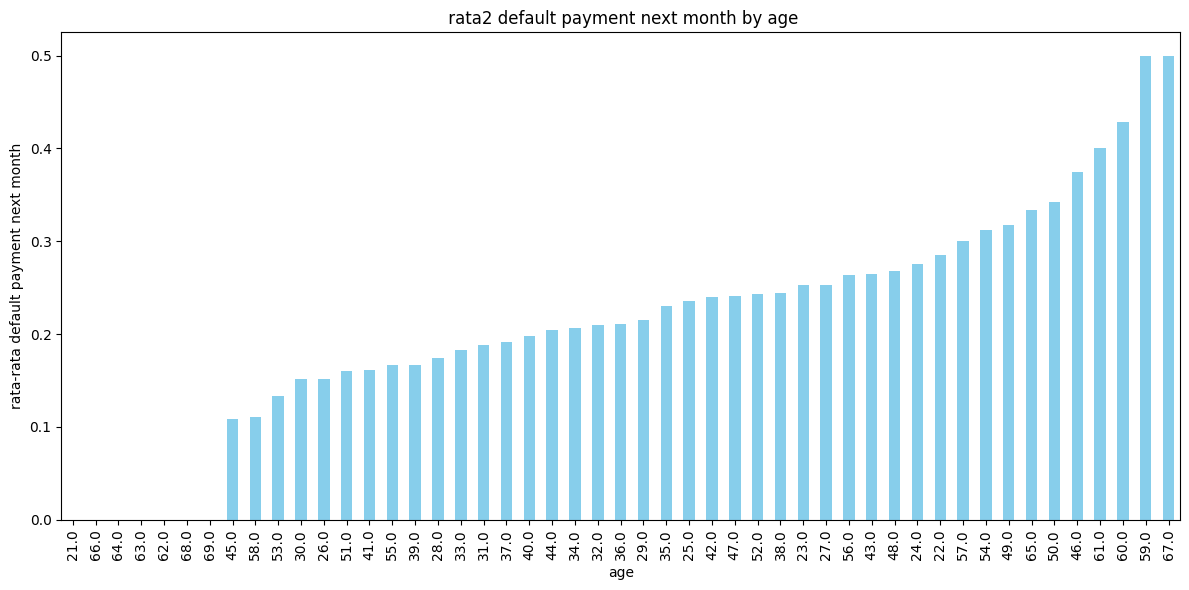

In [15]:
# Hitung harga rata-rata untuk setiap nama
average_price_by_name = df.groupby('age')['default_payment_next_month'].mean().sort_values()

# Plotting
plt.figure(figsize=(12,6))
average_price_by_name.plot(kind='bar', color='skyblue')
plt.title(' rata2 default payment next month by age')
plt.xlabel('age')
plt.ylabel('rata-rata default payment next month')
plt.xticks(rotation=90)  # Putar label x untuk keterbacaan yang lebih baik
plt.tight_layout()
plt.show()


- variabel age disini adalah umur orang yang gagal melakukan pembayaran bulan berikutnya. <br>
- pada variabel umur, rata2 orang yang melakukan pembayaran cenderung diatas usia 45 sampai usia 67. <br>

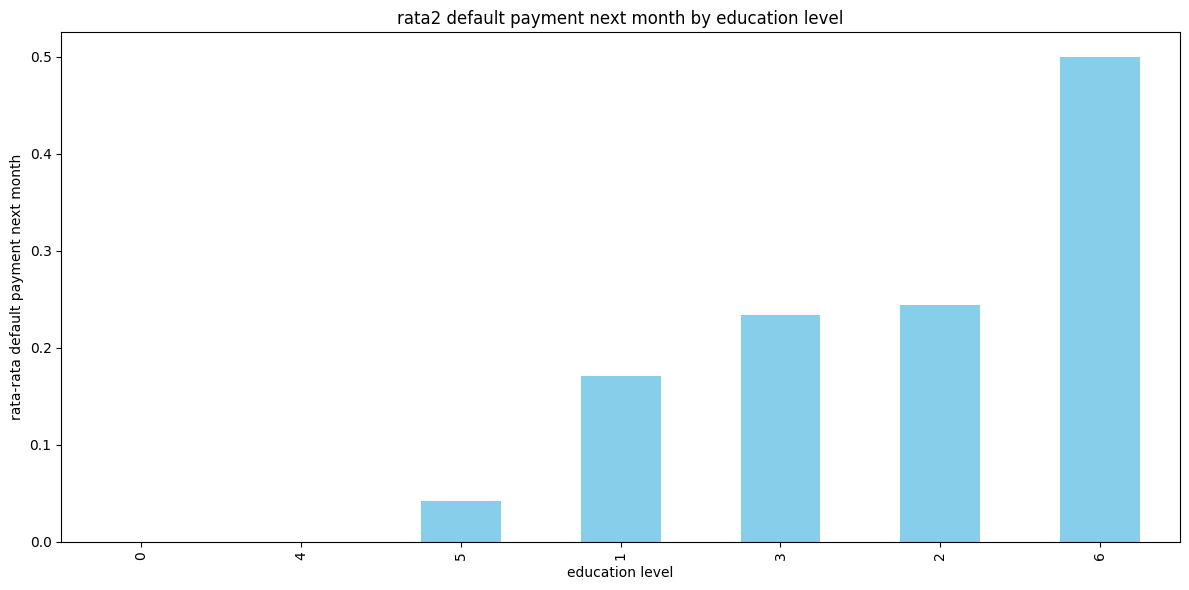

In [16]:
# Hitung harga rata-rata untuk setiap nama
average_price_by_name = df.groupby('education_level')['default_payment_next_month'].mean().sort_values()

# Plotting
plt.figure(figsize=(12,6))
average_price_by_name.plot(kind='bar', color='skyblue')
plt.title('rata2 default payment next month by education level')
plt.xlabel('education level')
plt.ylabel('rata-rata default payment next month')
plt.xticks(rotation=90)  # Putar label x untuk keterbacaan yang lebih baik
plt.tight_layout()
plt.show()


- variabel education level disini adalah tingkat pendidikan orang yang gagal melakukan pembayaran bulan berikutnya. <br>
- pada variabel education level, rata2 orang yang gagal melakukan pembayaran cenderung memiliki tingkat pendidikan nya tidak diketahui. <br>

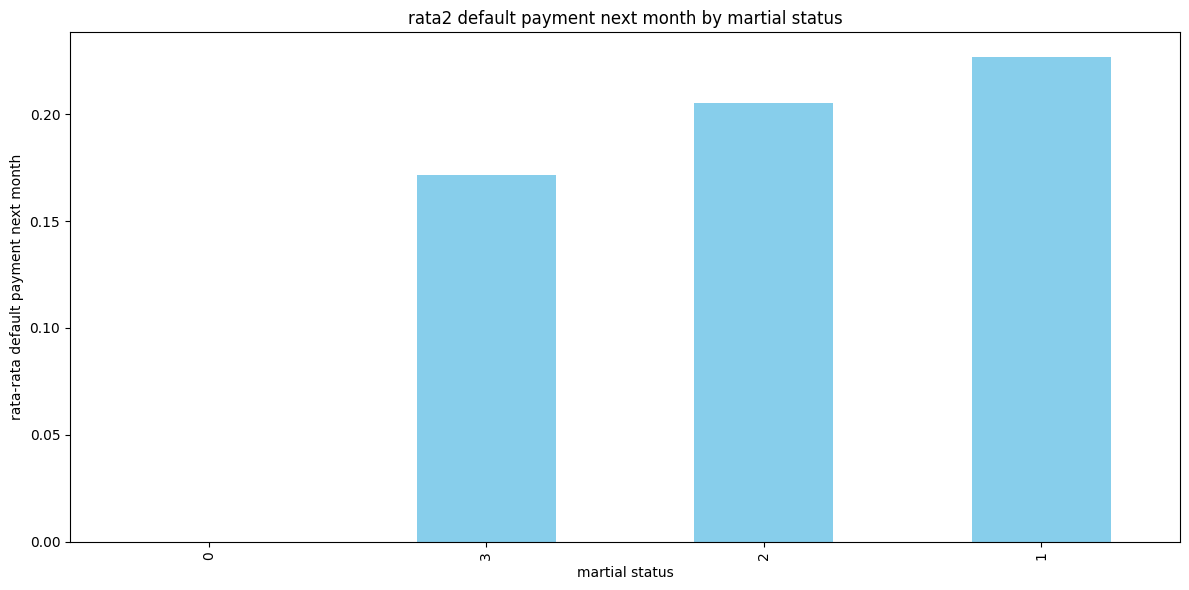

In [17]:
# Hitung harga rata-rata untuk setiap nama
average_price_by_name = df.groupby('marital_status')['default_payment_next_month'].mean().sort_values()

# Plotting
plt.figure(figsize=(12,6))
average_price_by_name.plot(kind='bar', color='skyblue')
plt.title('rata2 default payment next month by martial status')
plt.xlabel('martial status')
plt.ylabel('rata-rata default payment next month')
plt.xticks(rotation=90)  # Putar label x untuk keterbacaan yang lebih baik
plt.tight_layout()
plt.show()

- variabel marital disini adalah status pernikahan orang yang gagal melakukan pembayaran bulan berikutnya. <br>
- pada variabel marital, rata2 orang yang melakukan pembayaran lebih banyak yang sudah menikah. <br>

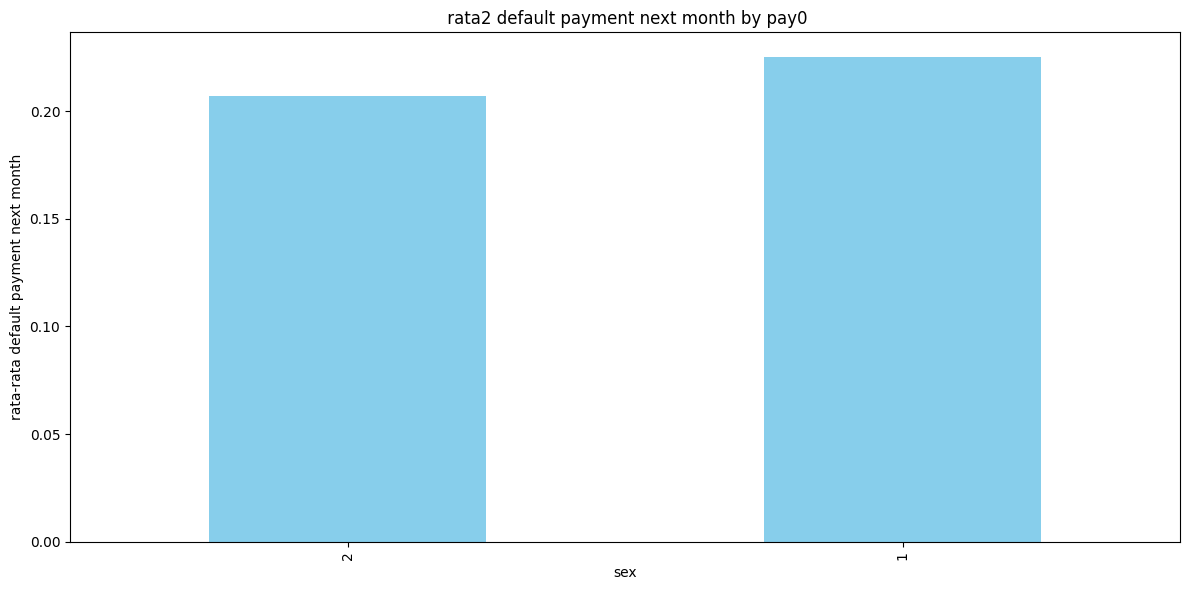

In [18]:
# Hitung harga rata-rata untuk setiap nama
average_price_by_name = df.groupby('sex')['default_payment_next_month'].mean().sort_values()

# Plotting
plt.figure(figsize=(12,6))
average_price_by_name.plot(kind='bar', color='skyblue')
plt.title(' rata2 default payment next month by pay0')
plt.xlabel('sex')
plt.ylabel('rata-rata default payment next month')
plt.xticks(rotation=90)  # Putar label x untuk keterbacaan yang lebih baik
plt.tight_layout()
plt.show()

- variabel sex disini adalah gender orang yang yang gagal melakukan pembayaran bulan berikutnya. <br>
- pada variabel sex, rata2 orang yang gagal melakukan pembayaran lebih banyak adalah pria dibanding wanita. <br>


---

## <a id="feature-engineering">**5. Feature Engineering**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/256/2861/2861721.png" alt="drawing" width="64" align="center"/></a>

---


---

### <a id="split-train-test">**A. Split Train-Test**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/5217/5217420.png" alt="drawing" width="64" align="center"/></a>

---

In [19]:
# Menentukan fitur dan variabel target
X = df.drop('default_payment_next_month', axis=1)  # Memisahkan kolom 'price' sebagai variabel target
y = df['default_payment_next_month']  # Variabel yang akan diprediksi

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)  # Membagi data dengan ukuran set pengujian sebesar 20% dan random state 55


data dipisah menjadi X dan y
- X sebagai variabel dependent atau bergantung pada fitur yaitu default_payment_next_month
- y sebagai variabel independent atau tidak bergantung pada variabel (kolom selain default_paymennt_next_month)

- kemudian data dipisah lagi di X menjadi 80% data latih (X_train) dan 20% data testing (X_test)
- begitu juga data di y dipisah lagi menjadi 80% data test (y_train) dan 20% data testing (y_test)

### B. missing value handling 

setelah dicek di data loading diketahui tidak ada indikasi bahwa adanya data missing jadi tidak diperlukan missing value handling


---

### <a id="outlier-handling">**C. Outlier Handling**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/9850/9850870.png" alt="drawing" width="64" align="center"/></a>

---

memisah data hasil split train test berdasarkan variabel kategorical dan numerikal  <br> 
kolom atau variabel yang memiliki unique  dibawah 20 termasuk variabel kategorikal. <br>
variabel yang memiliki unique value nya diatas 20 adalah variabel numerik

In [20]:
# Menghitung jumlah nilai unik (variasi) di setiap kolom
num_unique_values = X_train.nunique()

# Ambang batas untuk memilih kolom kategorikal berdasarkan jumlah nilai unik
# Sesuaikan ambang batas ini sesuai kebutuhan
unique_value_threshold = 15

# Memisahkan kolom berdasarkan jumlah nilai unik
category_columns = num_unique_values[num_unique_values <= unique_value_threshold].index.tolist()  # Kolom kategorikal
numeric_columns = num_unique_values[num_unique_values > unique_value_threshold].index.tolist()  # Kolom numerik

# Cetak kolom kategorikal
print('Kolom Kategori (<= {} nilai unik): {}'.format(unique_value_threshold, category_columns))

# Cetak kolom numerik
print('Kolom Numerik (> {} nilai unik): {}'.format(unique_value_threshold, numeric_columns))


Kolom Kategori (<= 15 nilai unik): ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Kolom Numerik (> 15 nilai unik): ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


pada tahapan ini dilakukan pengecekan distribusi data, data dicek apakah memiliki distribusi normal dan mengecek ada tidaknya skew pada data. <br>
sebelumnya data yang digunakan adalah data numerik untuk itu dipisahkan kolom numerik dari data <br>
kolom numerik ini lalu di pisah lagi menjadi kelompok kolom yang memiliki distribusi normal dan kolom dengan distribusi tidak normal atau memiliki skew sebagai berikut :<br>

- Data yang memiliki distribusi normal berada dalam rentang skewness kurang dari atau sama dengan 0.5 dan lebih besar dari atau sama dengan -0.5.
- Data yang memiliki kemiringan negatif yang tinggi (skewness < -1) termasuk dalam kolom yang miring dengan tingkat "high".
- Data yang memiliki kemiringan positif yang tinggi (skewness > 1) juga termasuk dalam kolom yang miring dengan tingkat "high".
- Data yang memiliki kemiringan negatif yang sedang (skewness kurang dari atau sama dengan -0.5 dan lebih besar dari -1) termasuk dalam kolom yang miring dengan tingkat "low".
- Data yang memiliki kemiringan positif yang sedang (skewness lebih besar dari atau sama dengan 0.5 dan kurang dari 1) juga termasuk dalam kolom yang miring dengan tingkat "low".



In [21]:
# Membuat data dan kolom untuk distribusi normal
data_normal = []
column_normal = []

# Membuat data dan kolom untuk distribusi miring (skewed)
data_skewed = []
column_skewed = []

# Looping setiap kolom numerik untuk menyaring distribusi data menjadi kolom yang berdistribusi normal atau miring
for num in numeric_columns:
    skewness = X_train[num].skew()

    # Jika data berdistribusi normal
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # Jika data memiliki kemiringan negatif yang tinggi
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    ## Jika data memiliki kemiringan positif yang tinggi
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # Jika data memiliki kemiringan negatif yang sedang
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki kemiringan positif yang sedang
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])


In [22]:
# Membuat DataFrame dari data_normal 
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])  

,normal_distribution,skewness


setelah dicek terlihat dataset tidak memiliki  variabel yang distribusi nya normal

In [23]:
# Membuat DataFrame dari data_skewed 
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])  

,skewed_distribution,skewness,rate
0,limit_balance,1.036825,high
1,age,0.764011,low
2,bill_amt_1,2.458719,high
3,bill_amt_2,2.461699,high
4,bill_amt_3,2.495578,high
5,bill_amt_4,2.414854,high
6,bill_amt_5,2.410587,high
7,bill_amt_6,2.482656,high
8,pay_amt_1,11.677314,high
9,pay_amt_2,28.095787,high


- setelah dicek  telihat semua variabel di dataset memiliki outlier sehingga dataset distribusinya miring atau skew
- setelah dilakukan pengecekan diketahui bahwa dataset memiliki skew yang tinggi. <br>
- maka dari itu dilakukan handling outlier pada datataset <br>
- outlier handling yang dilakukan adalah censoring yang disebut juga winsorization atau capping yang berarti membatasi nilai maksimum dan minimum <br>
- karena datasetnya distribusi miring maka capping oulier dilakukan menggunakan metode IQR atau Interquartile range<br>
  (nilai fold atau jumlah IQR dari median ditetapkan menjadi 1.5. yang berarti nilai yang lebih dari 1.5 kali IQR dari median akan dicapping)

In [24]:
# Metode Capping untuk Distribusi Miring (Skewed)
winsorizer_skewed = Winsorizer(capping_method='iqr',  # Menggunakan metode capping IQR (Interquartile Range)
                            tail='both',  # Menerapkan capping pada kedua ekor distribusi
                            fold=1.5,  # Mengatur nilai fold (jumlah IQR dari median) menjadi 1.5
                            variables=column_skewed)  # Menerapkan capping pada kolom dengan distribusi miring

# Fit & Transformasi pada X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train)  # Melakukan fit dan transformasi pada data pelatihan yang sudah di-capping sebelumnya (X_train_capped)

# Transformasi pada X_test
X_test_capped = winsorizer_skewed.transform(X_test)  # Melakukan transformasi pada data pengujian yang sudah di-capping sebelumnya (X_test_capped)


In [25]:
# Plot Perbandingan Distribusi
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Ukuran gambar, dan Super Title berdasarkan variabel
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')  # Judul utama dari plot

    # Plot Histogram Sebelum Penanganan Outlier
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')  # Membuat histogram sebelum penanganan outlier
    axes[0, 0].set_title('Histogram Before')  # Judul subplot histogram sebelum

    # Plot Boxplot Sebelum Penanganan Outlier
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])  # Membuat boxplot sebelum penanganan outlier
    axes[1, 0].set_title('Boxplot Before')  # Judul subplot boxplot sebelum

    # Plot Histogram Setelah Penanganan Outlier
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')  # Membuat histogram setelah penanganan outlier
    axes[0, 1].set_title('Histogram After')  # Judul subplot histogram setelah

    # Plot Boxplot Setelah Penanganan Outlier
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])  # Membuat boxplot setelah penanganan outlier
    axes[1, 1].set_title('Boxplot After')  # Judul subplot boxplot setelah

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Menyesuaikan layout agar tidak saling tumpang tindih
    plt.show()  # Menampilkan plot


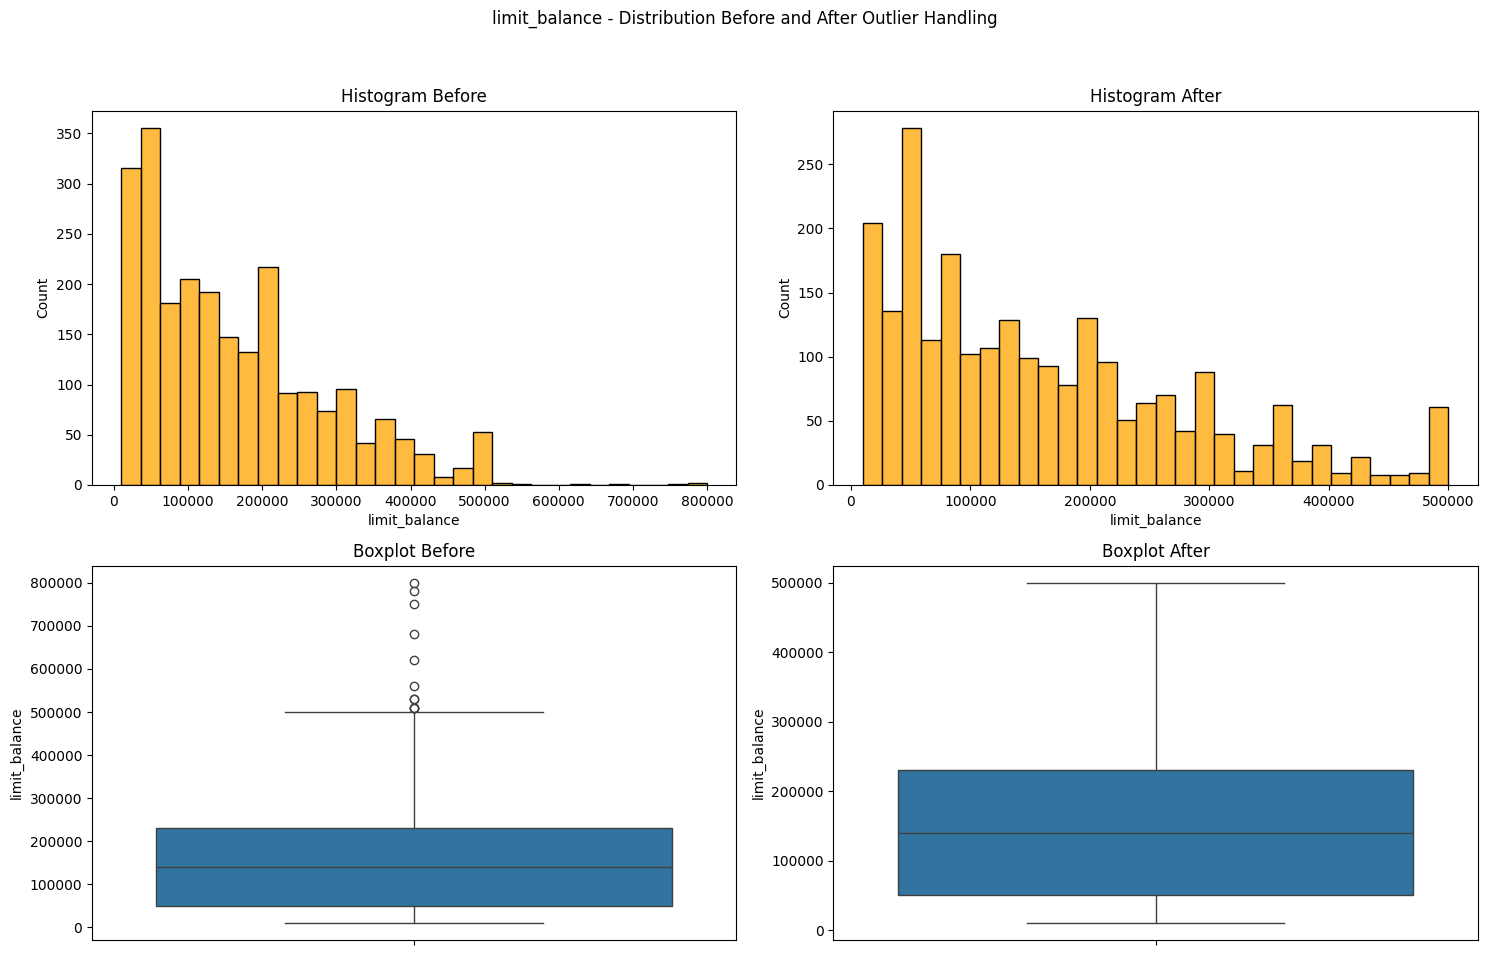

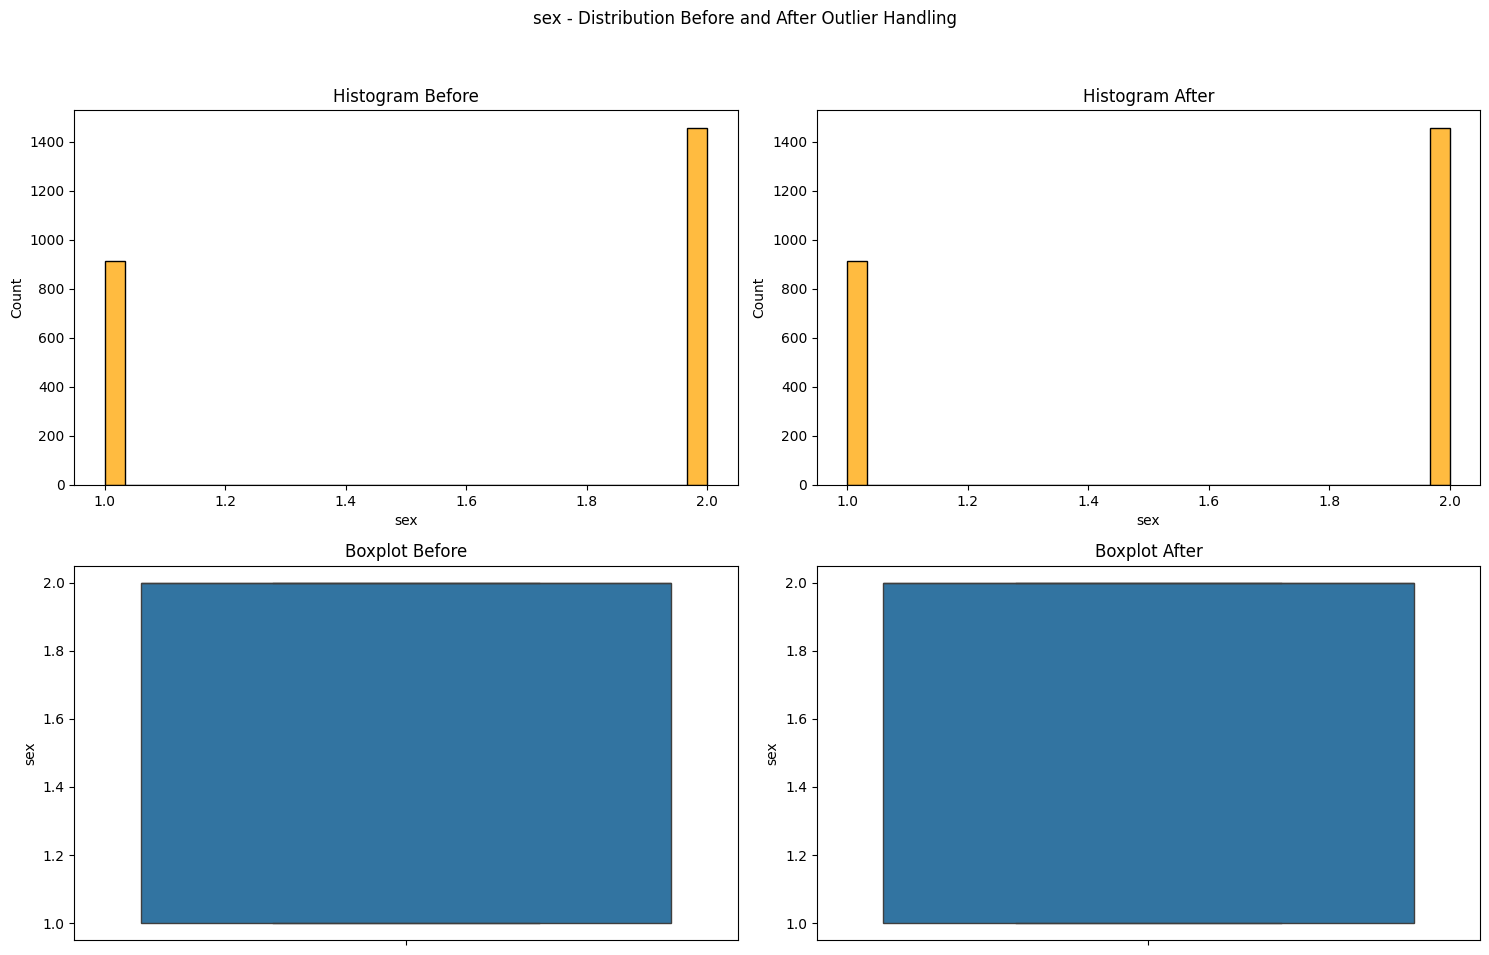

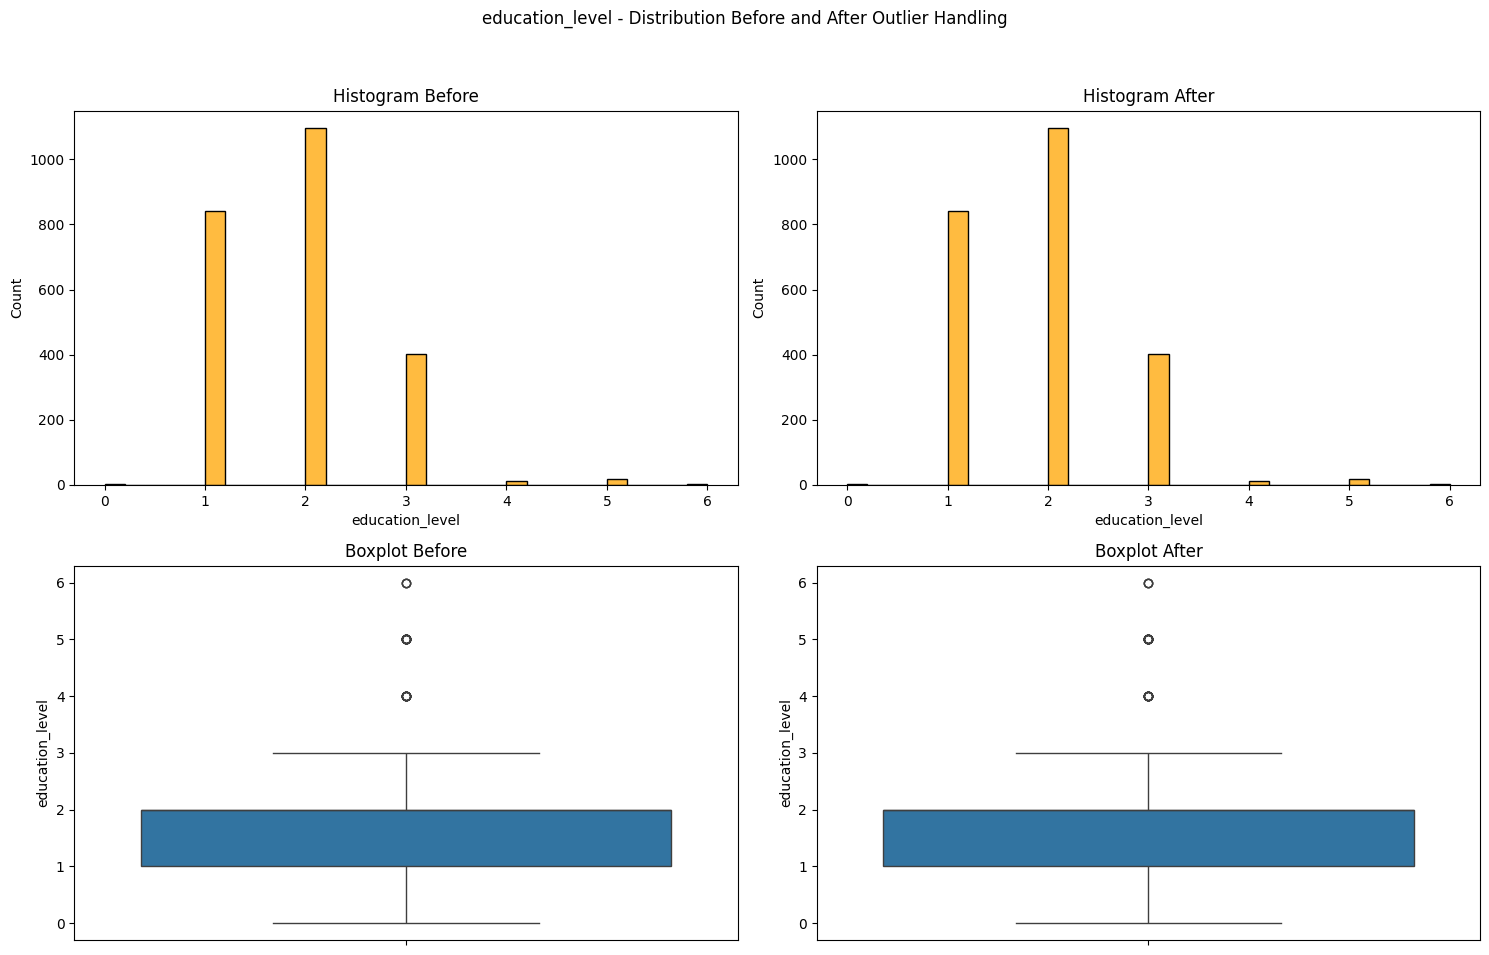

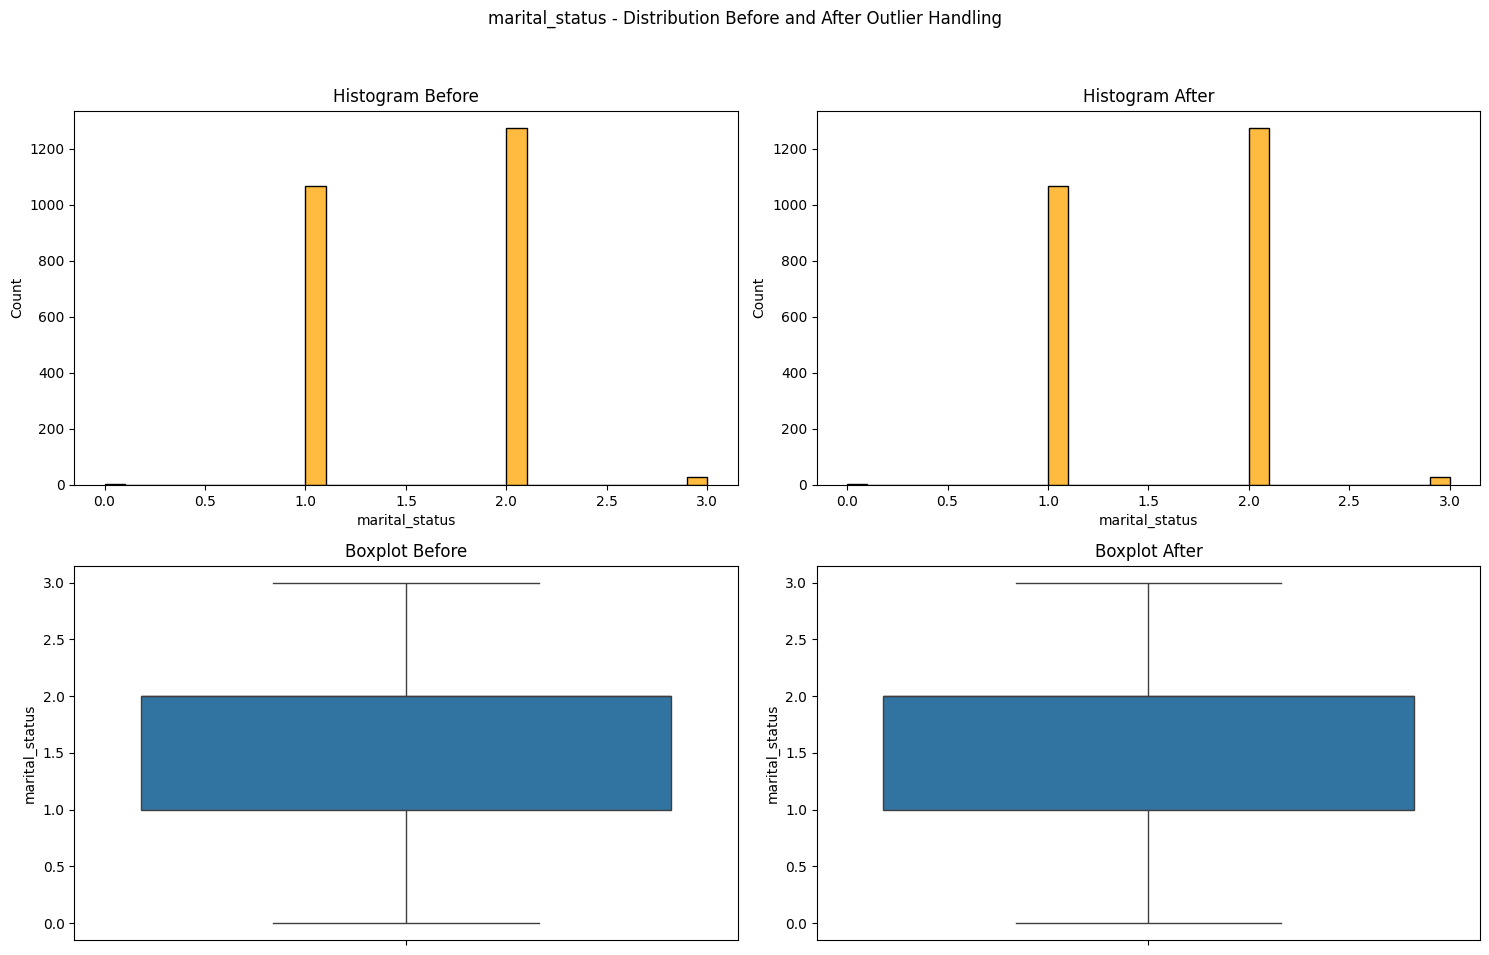

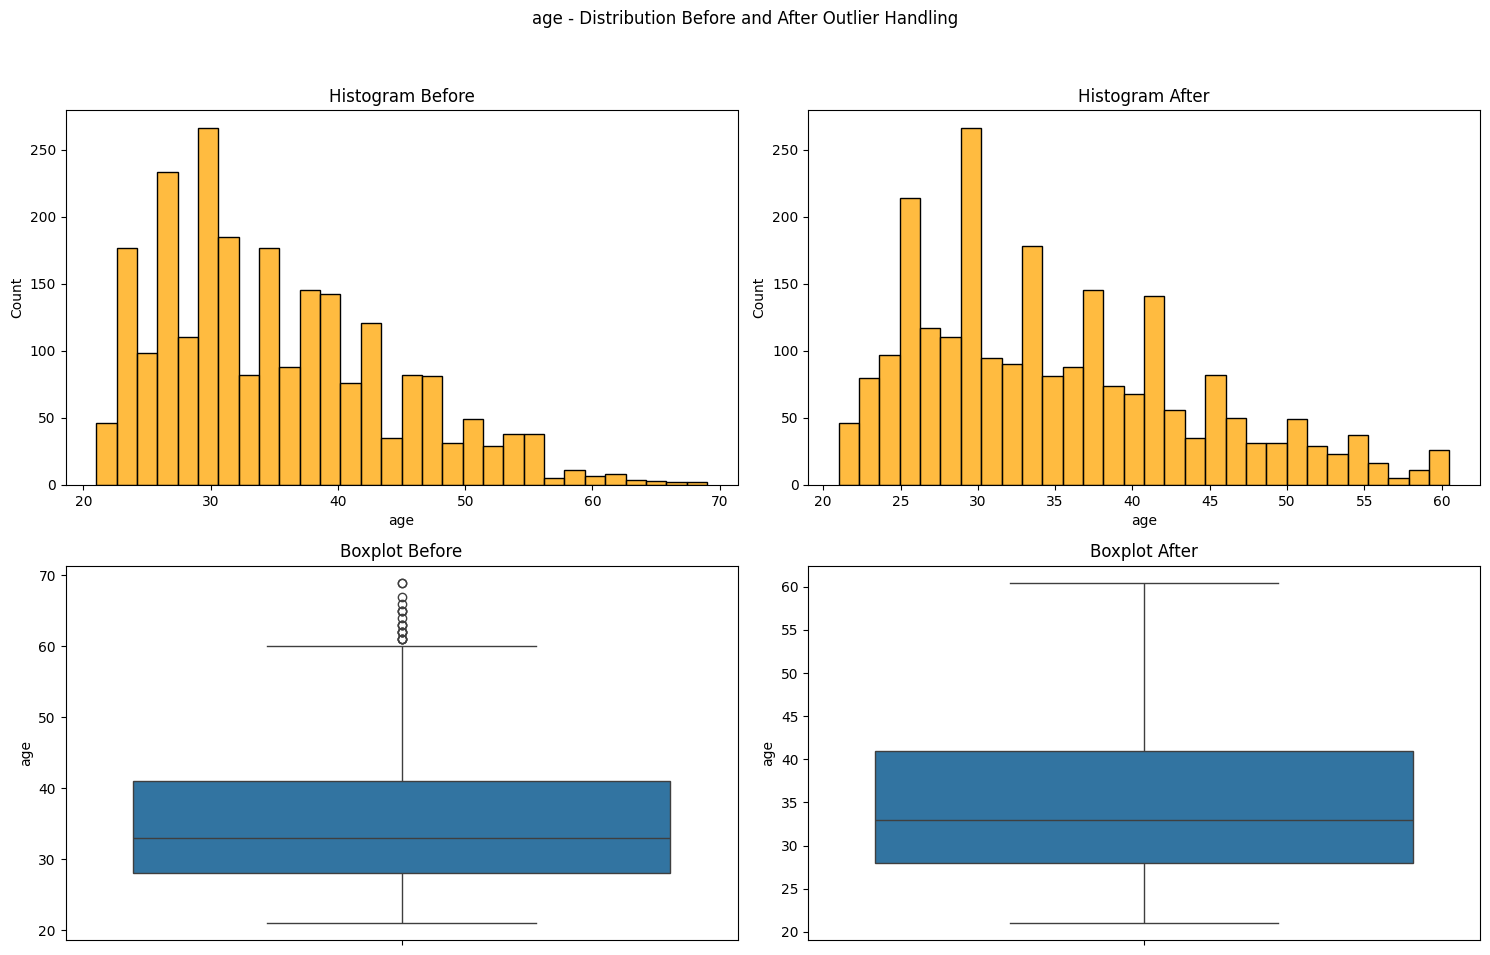

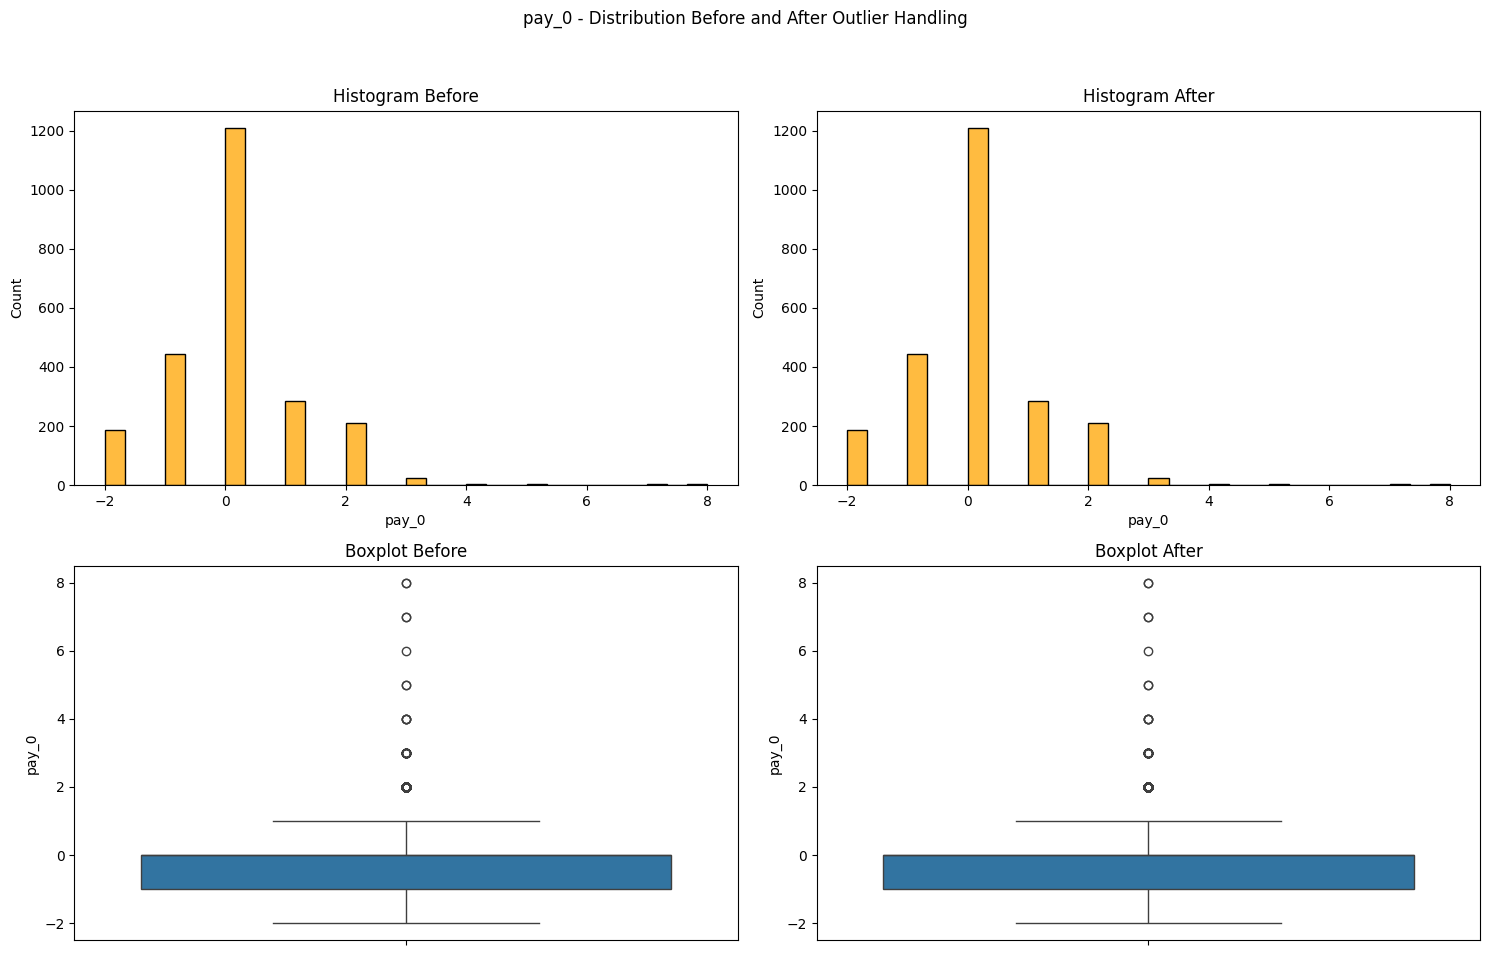

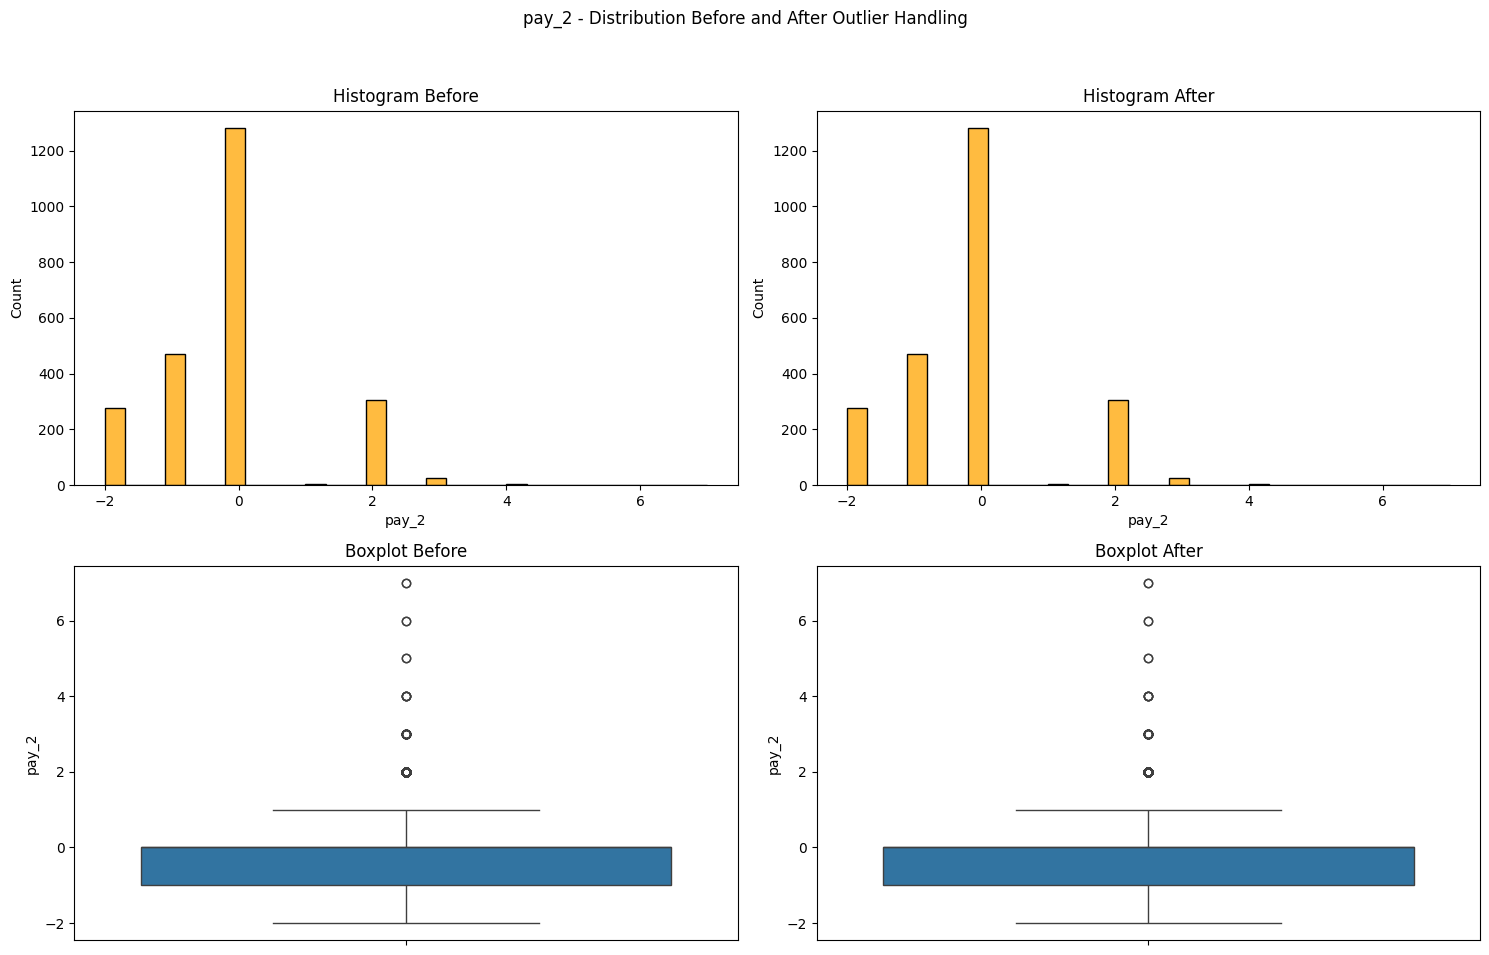

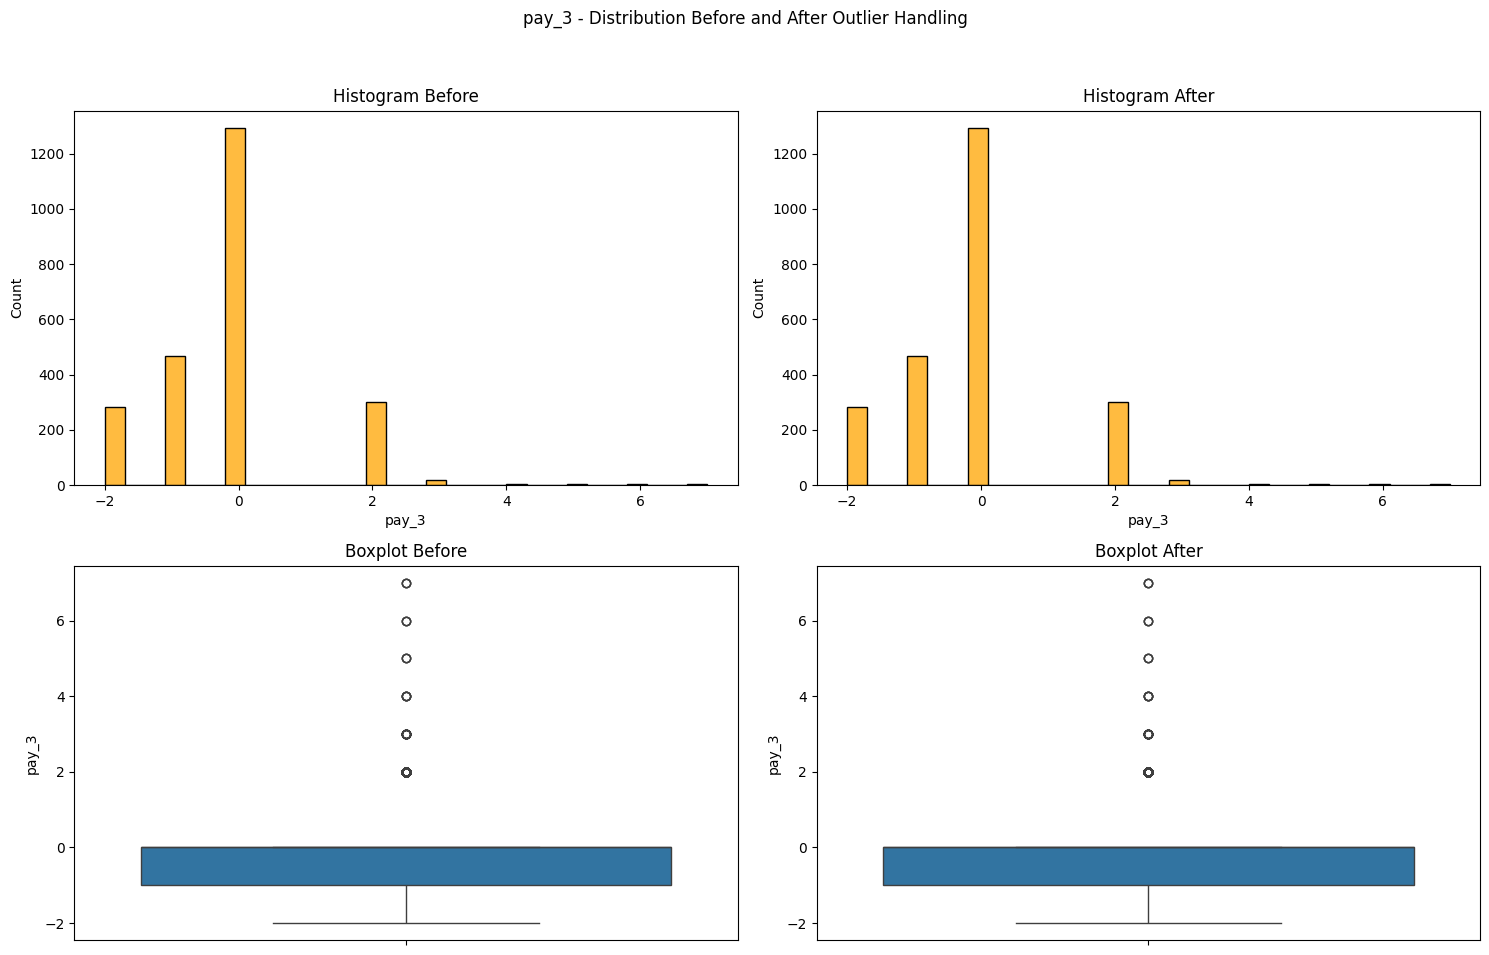

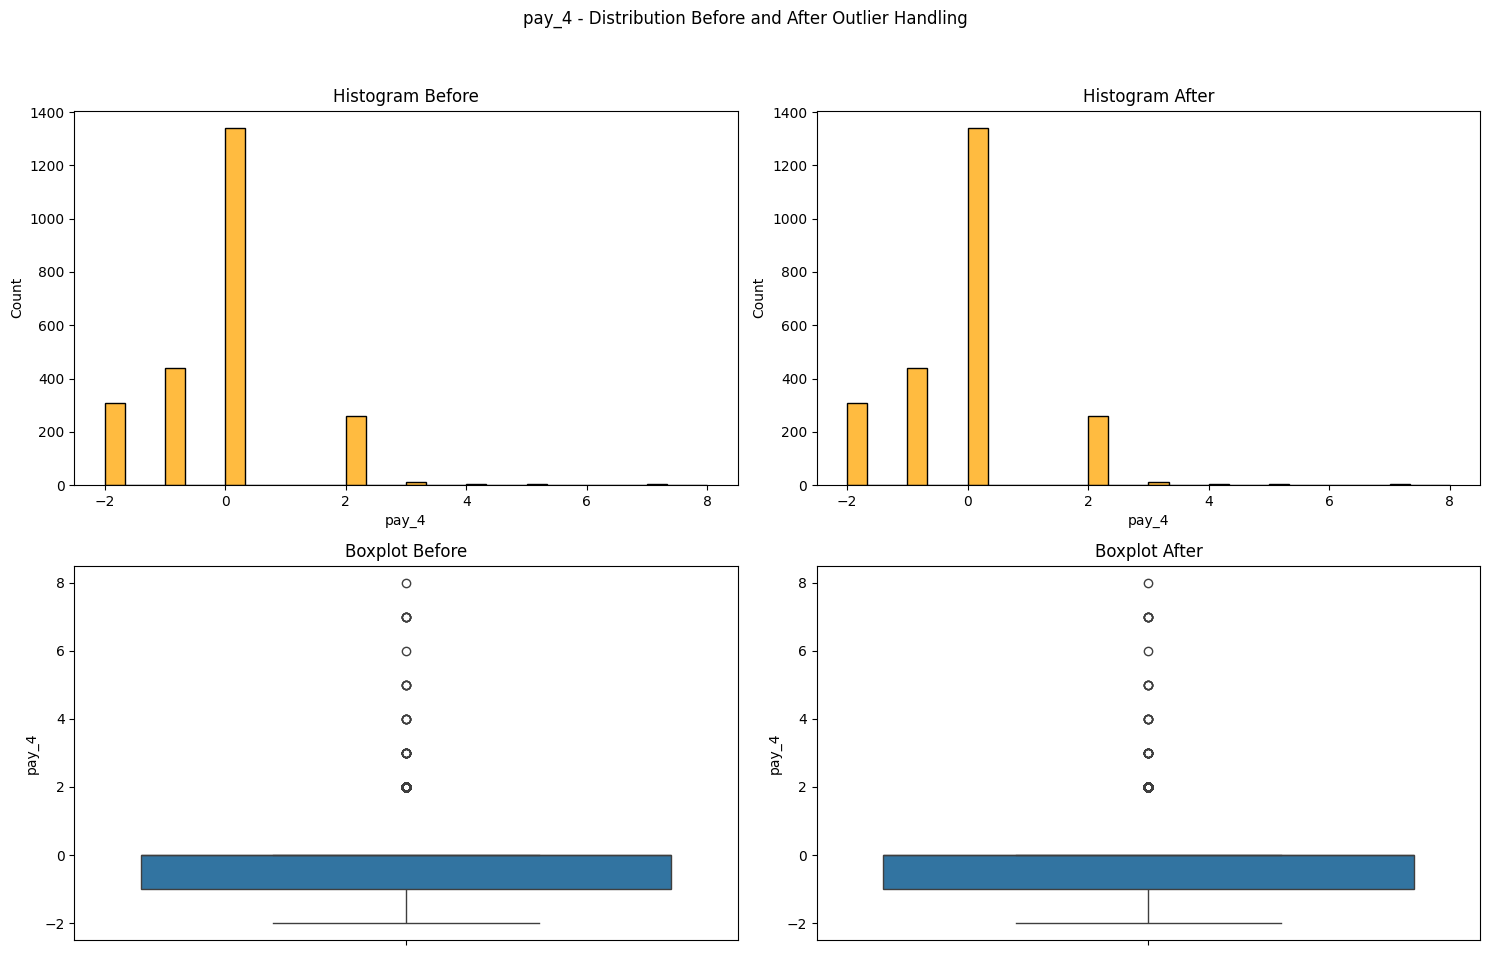

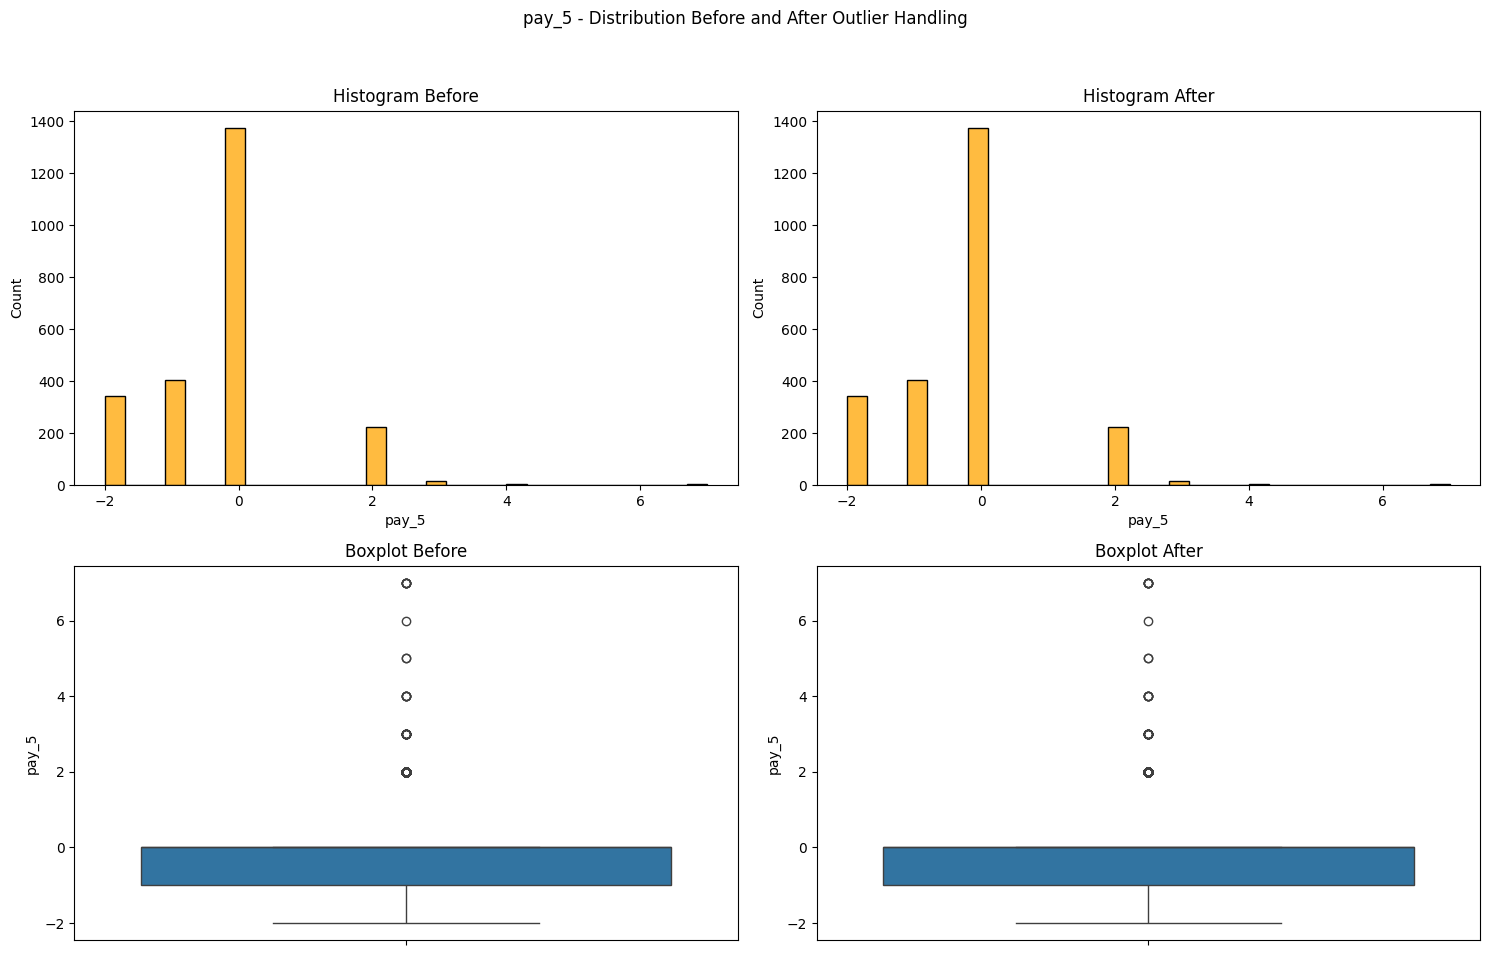

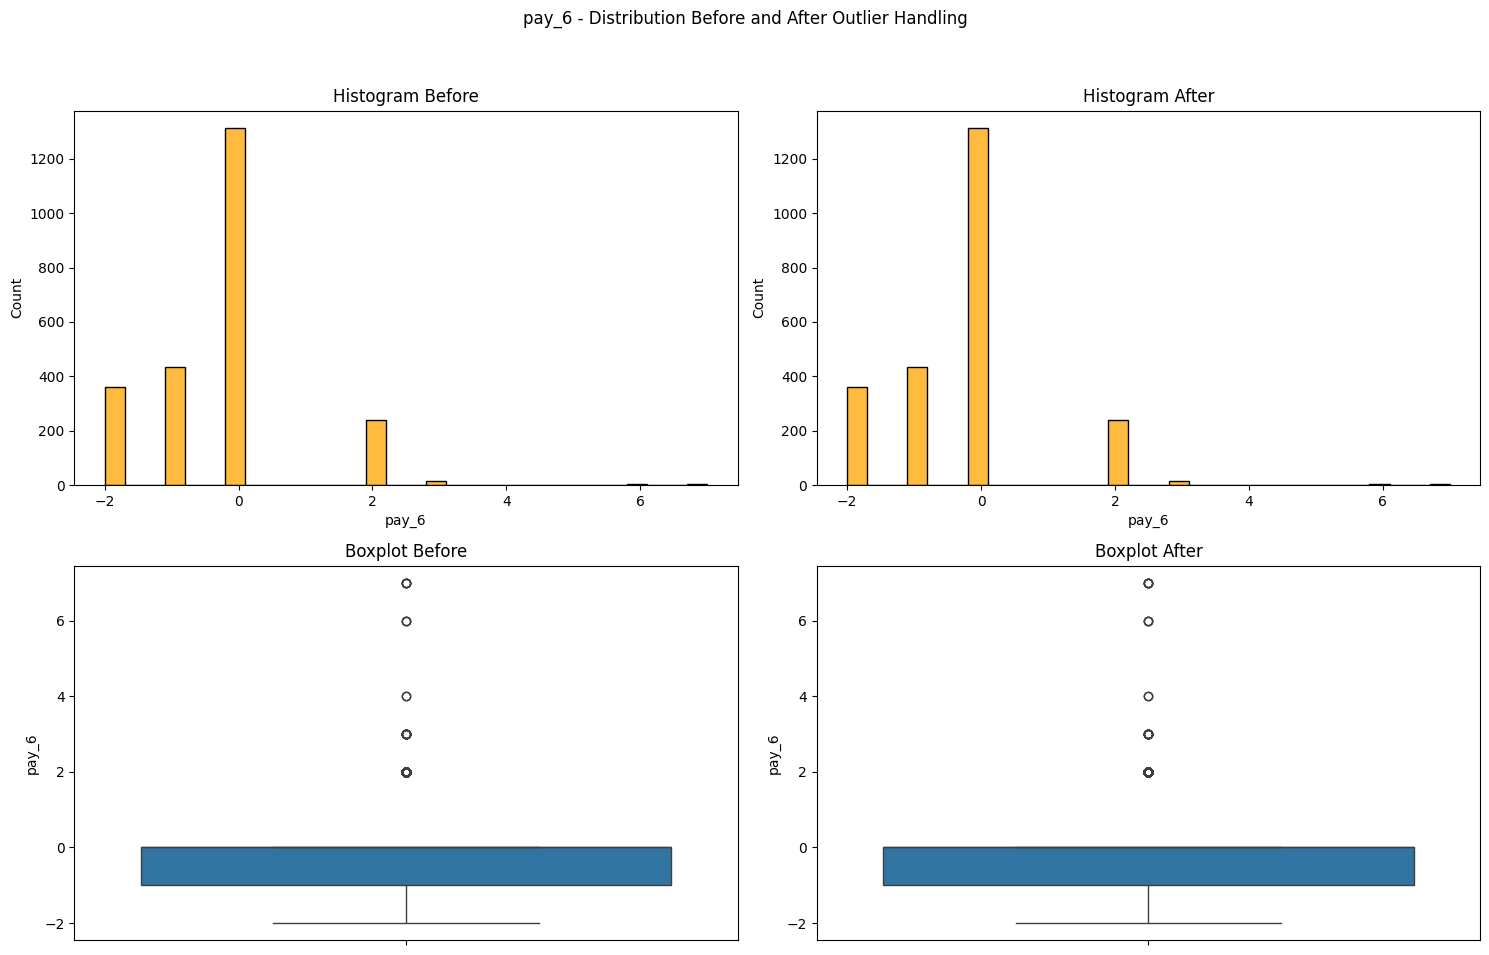

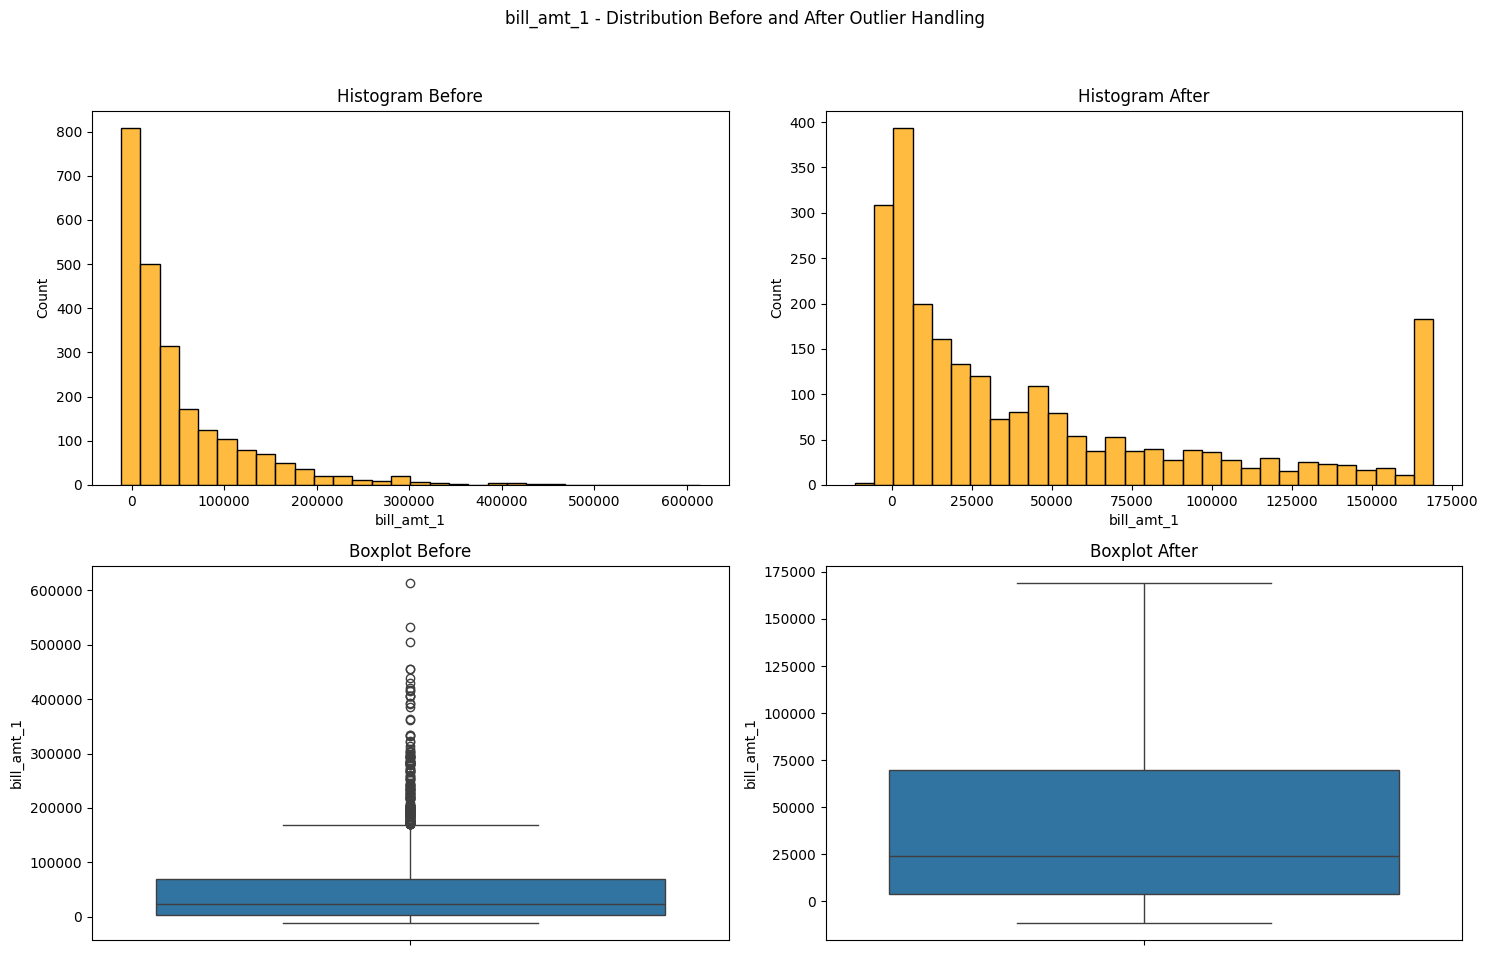

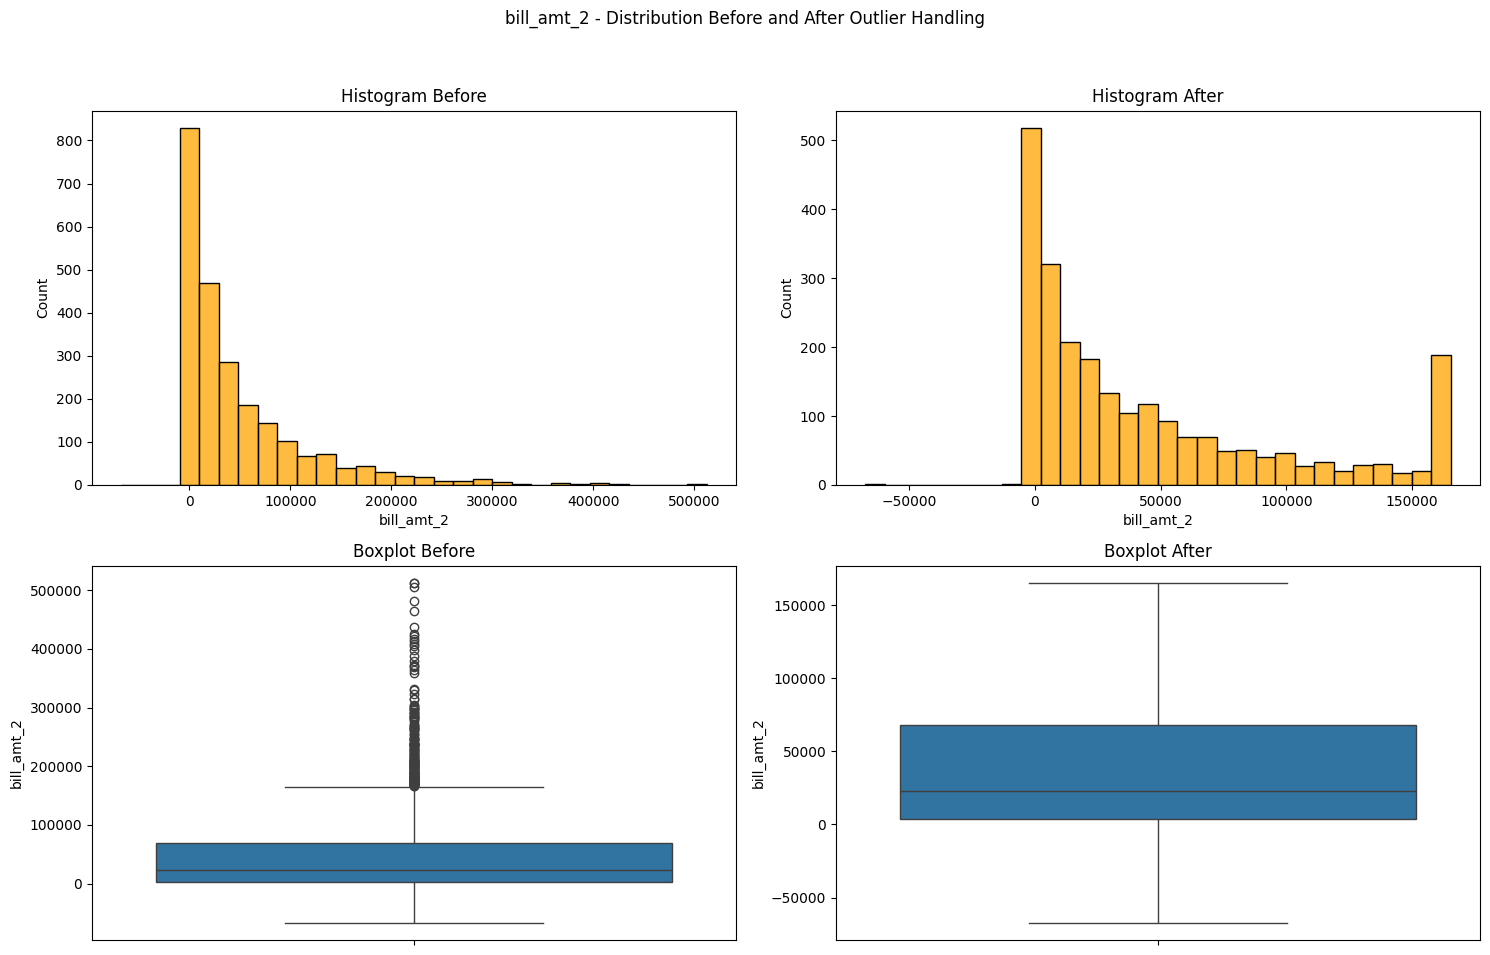

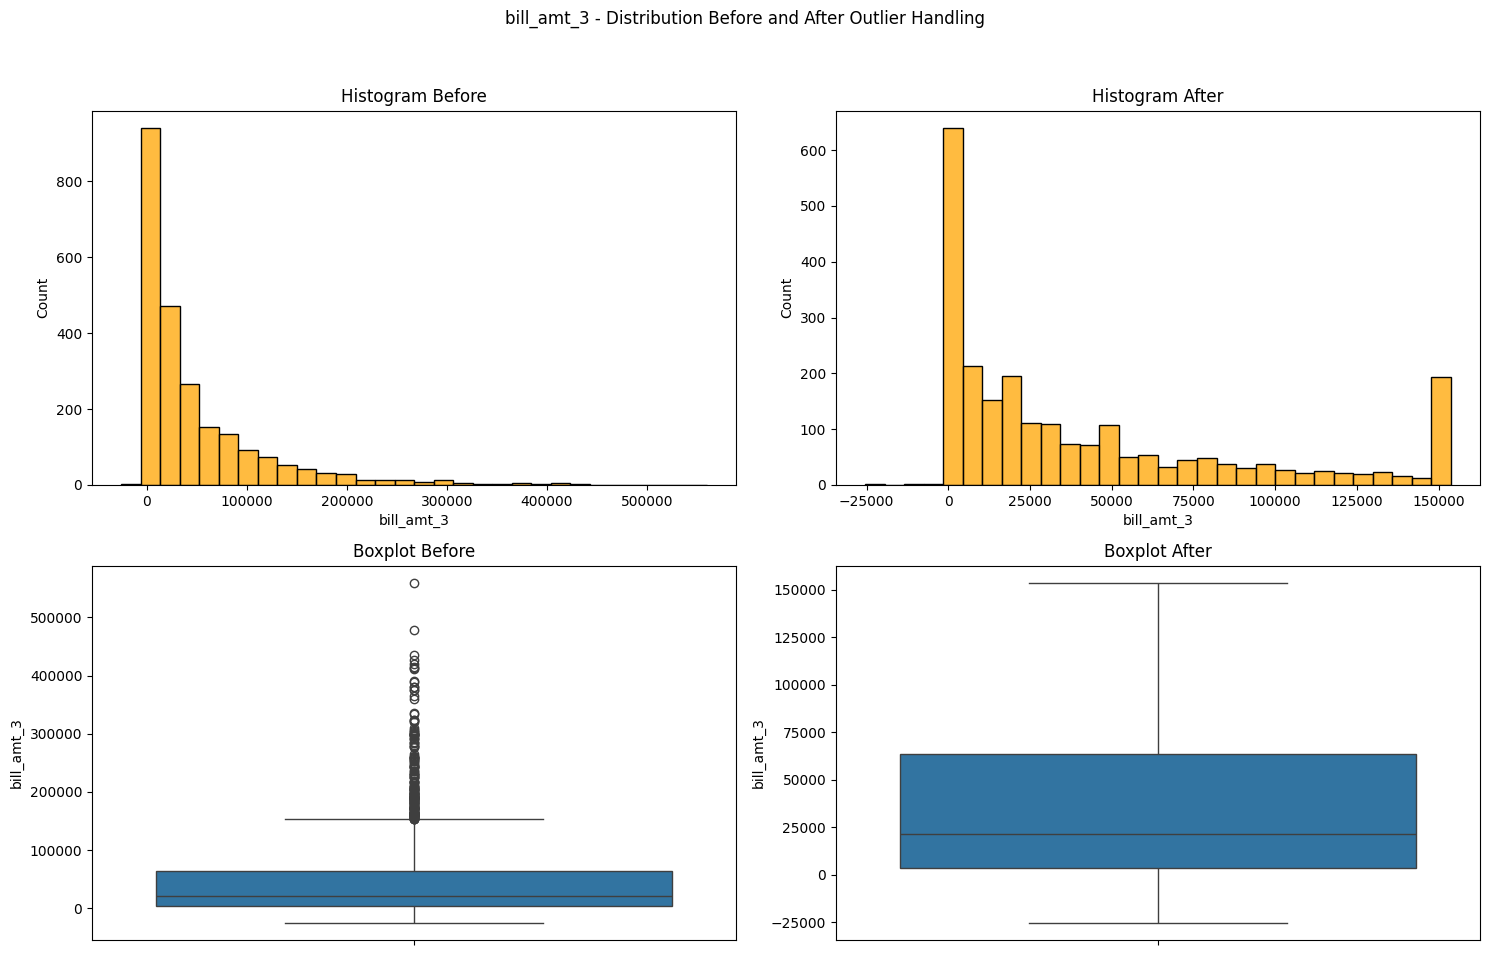

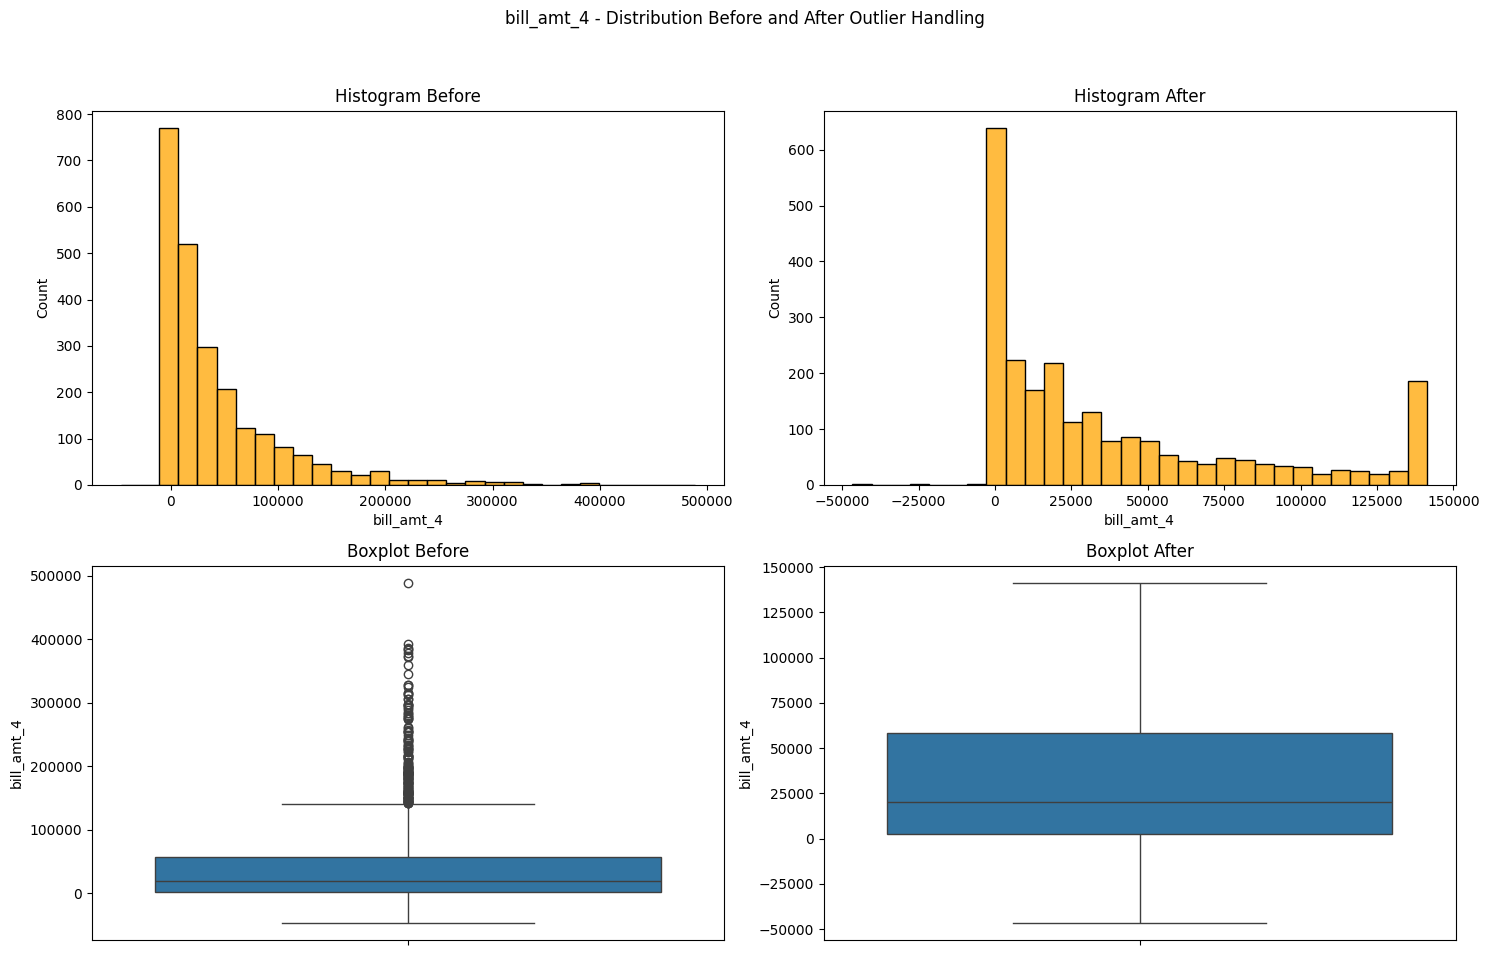

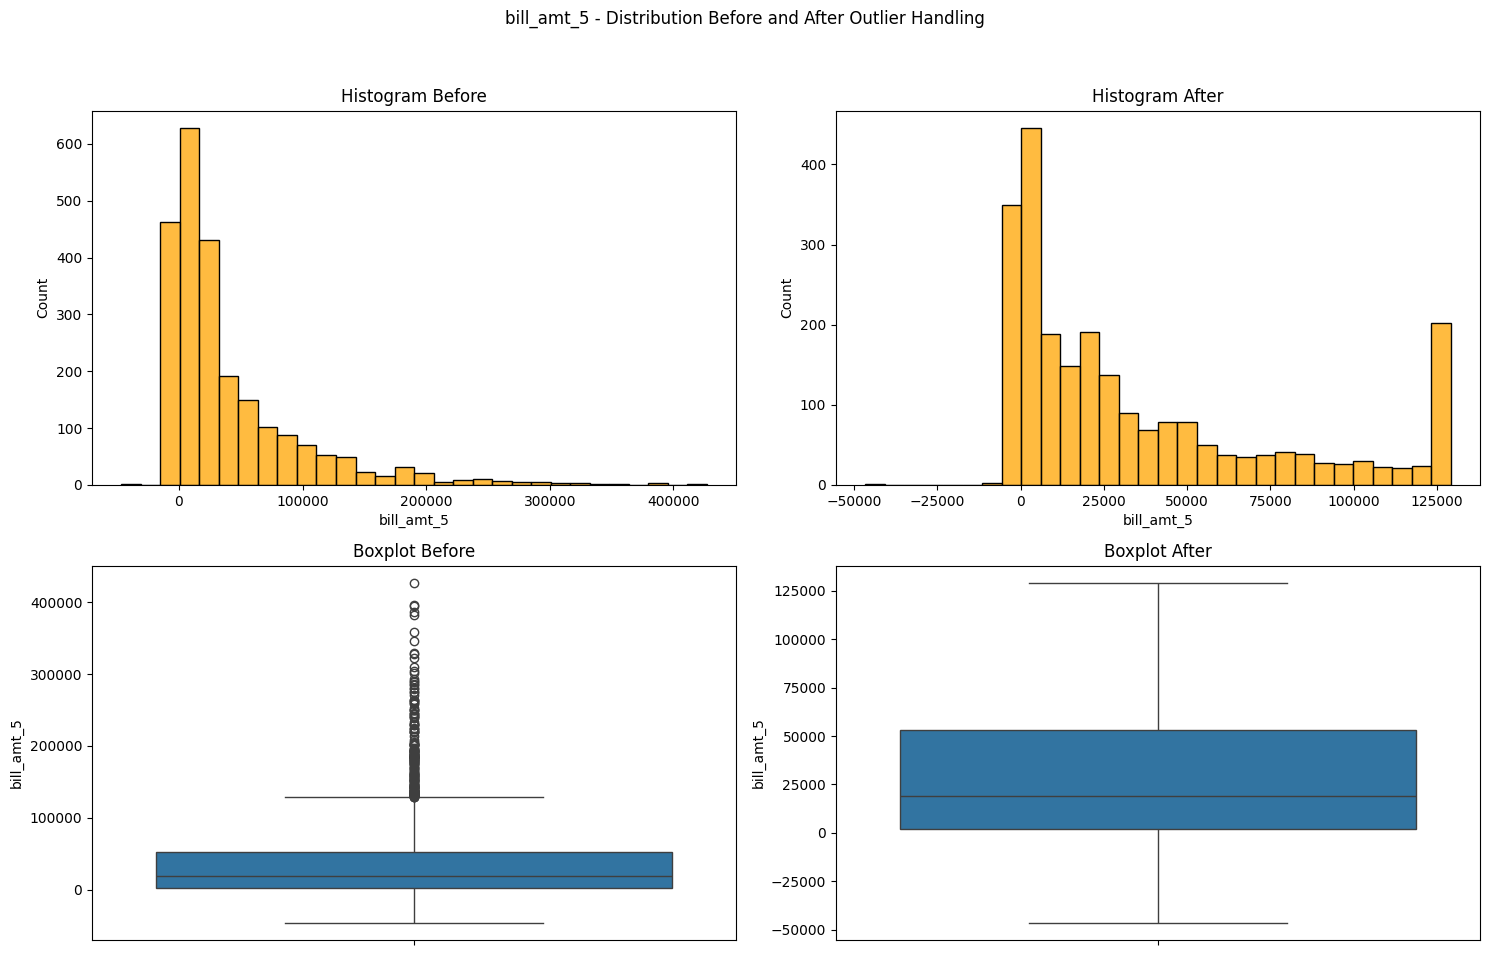

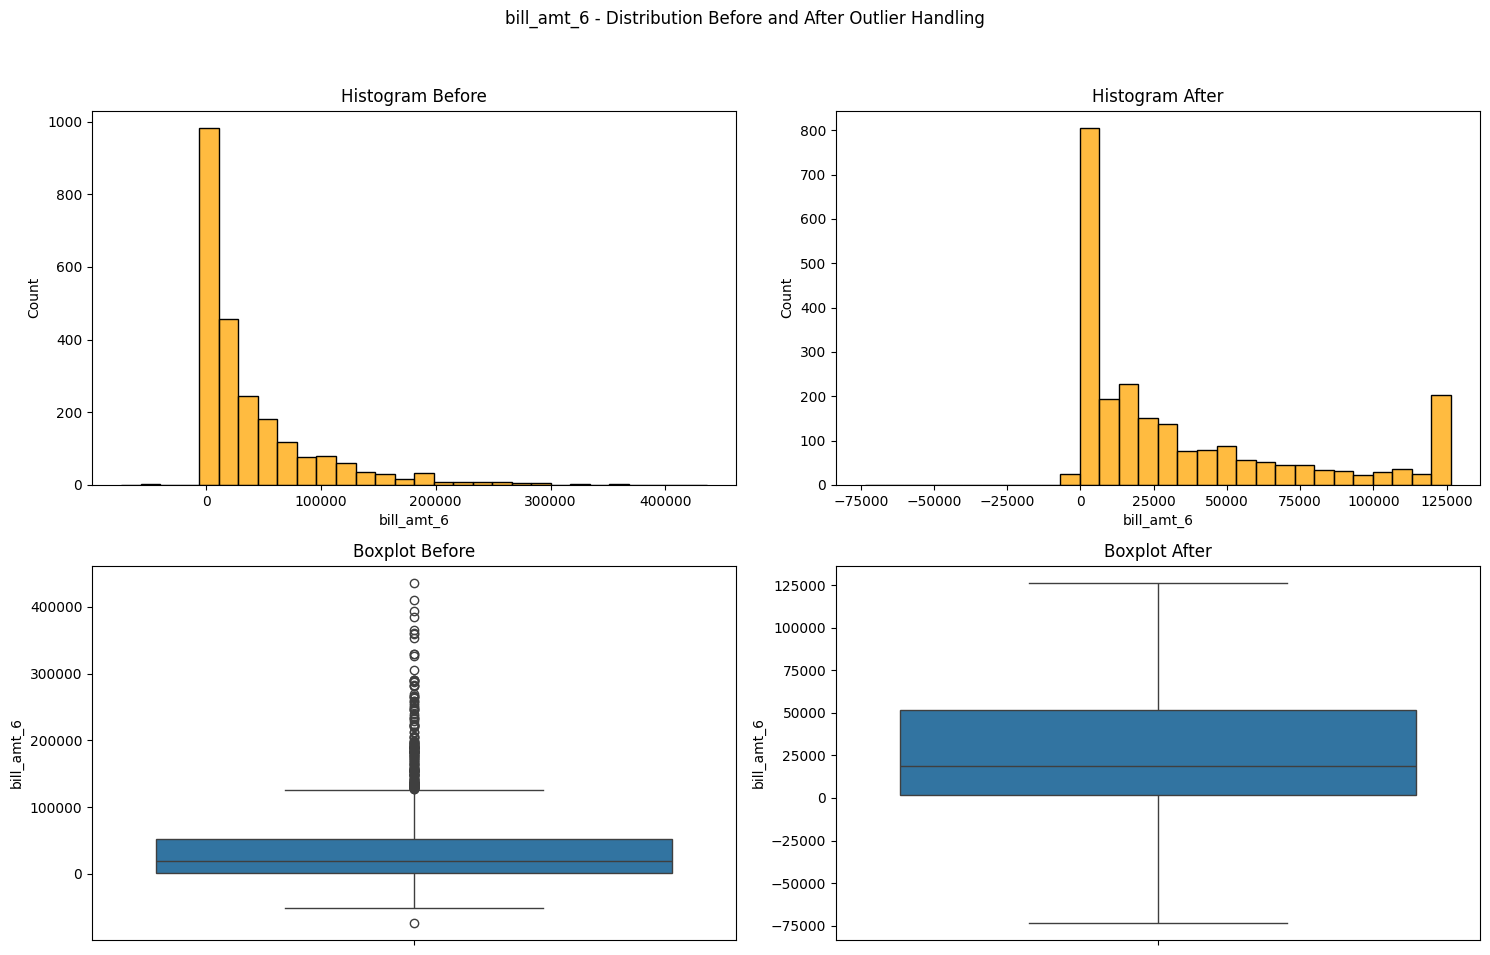

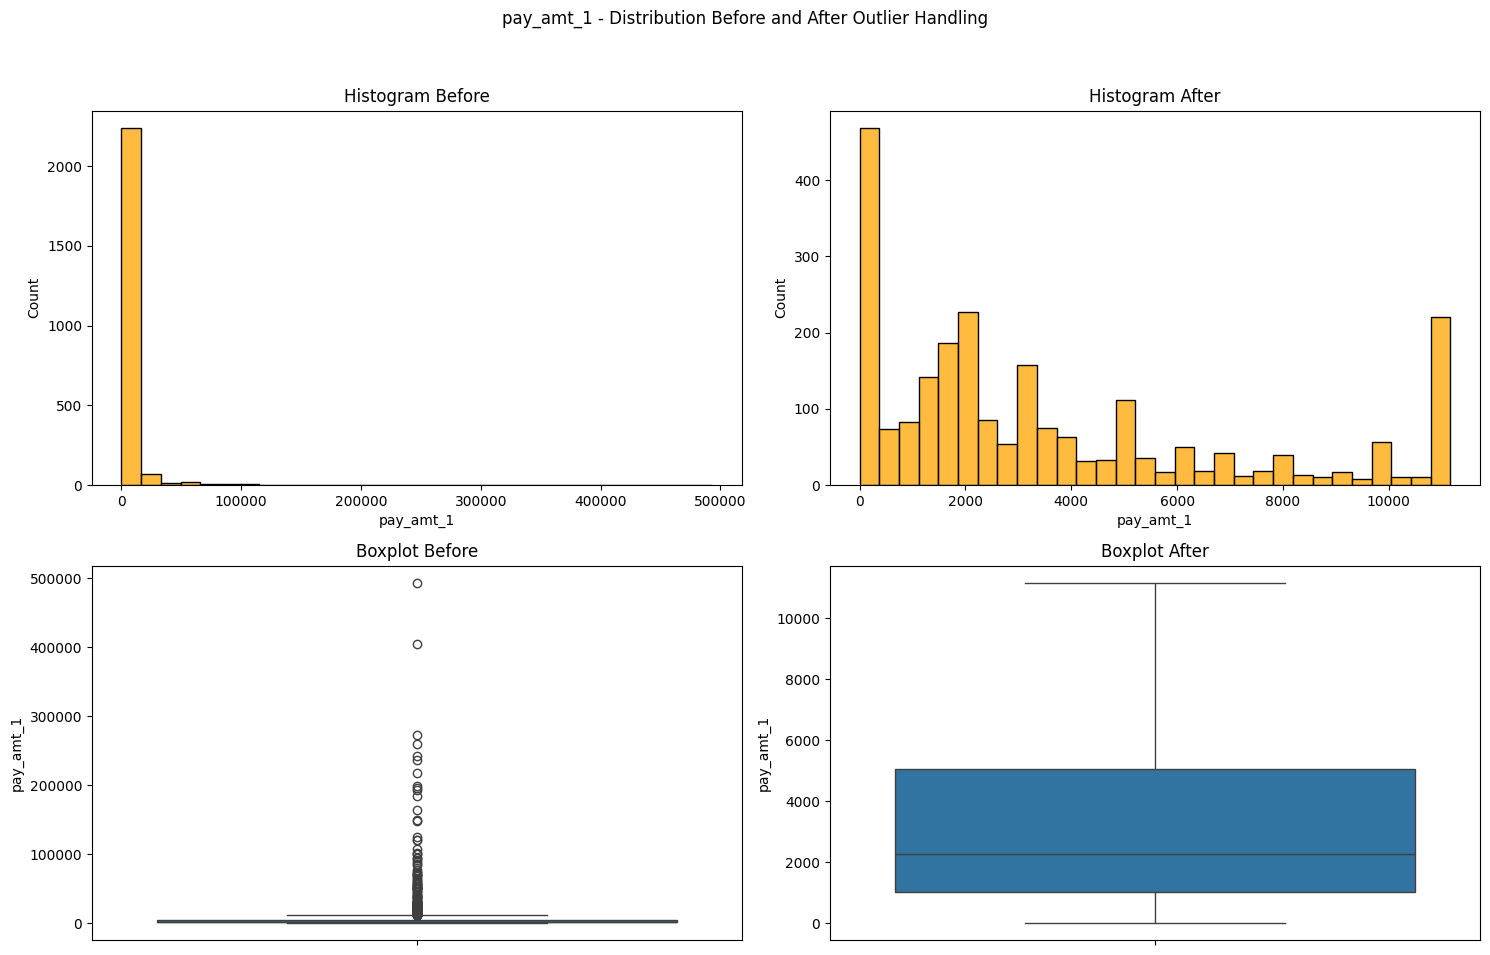

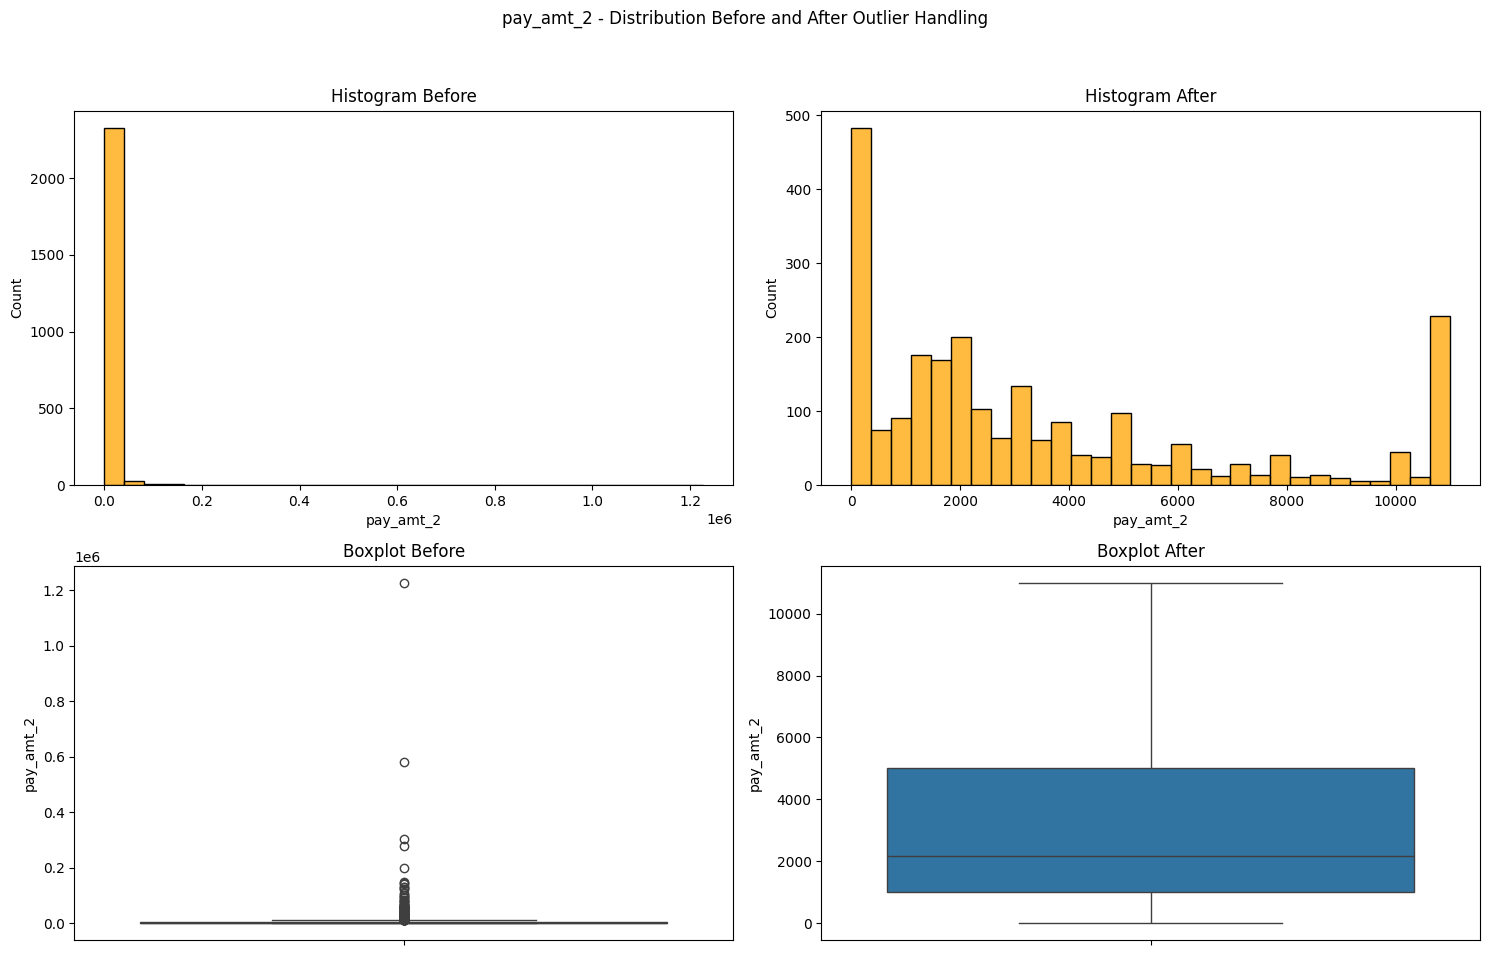

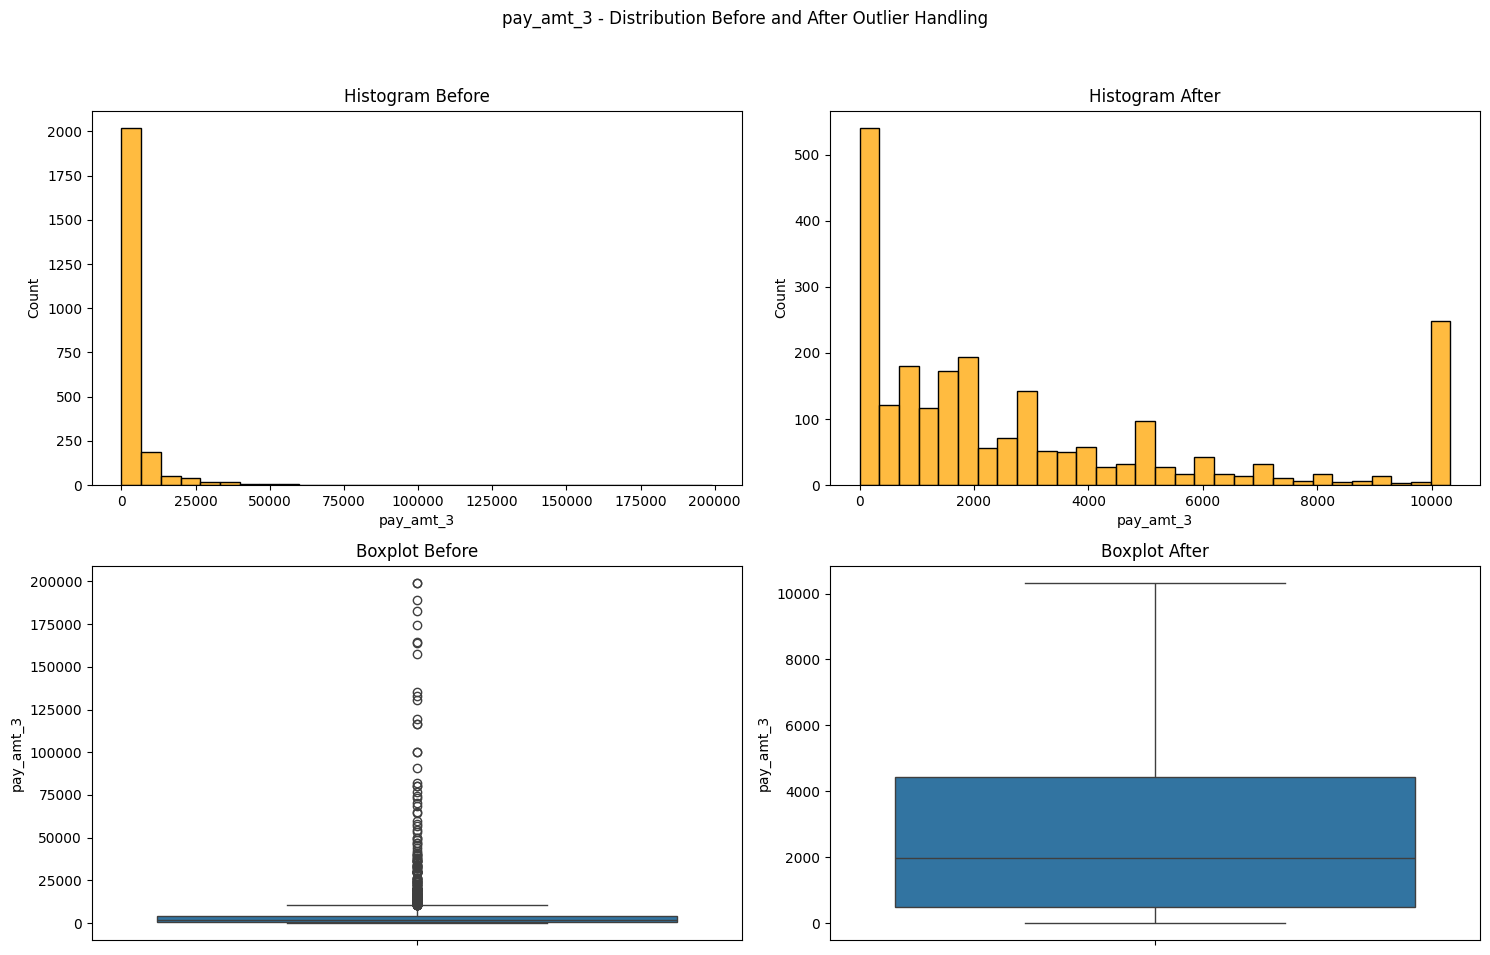

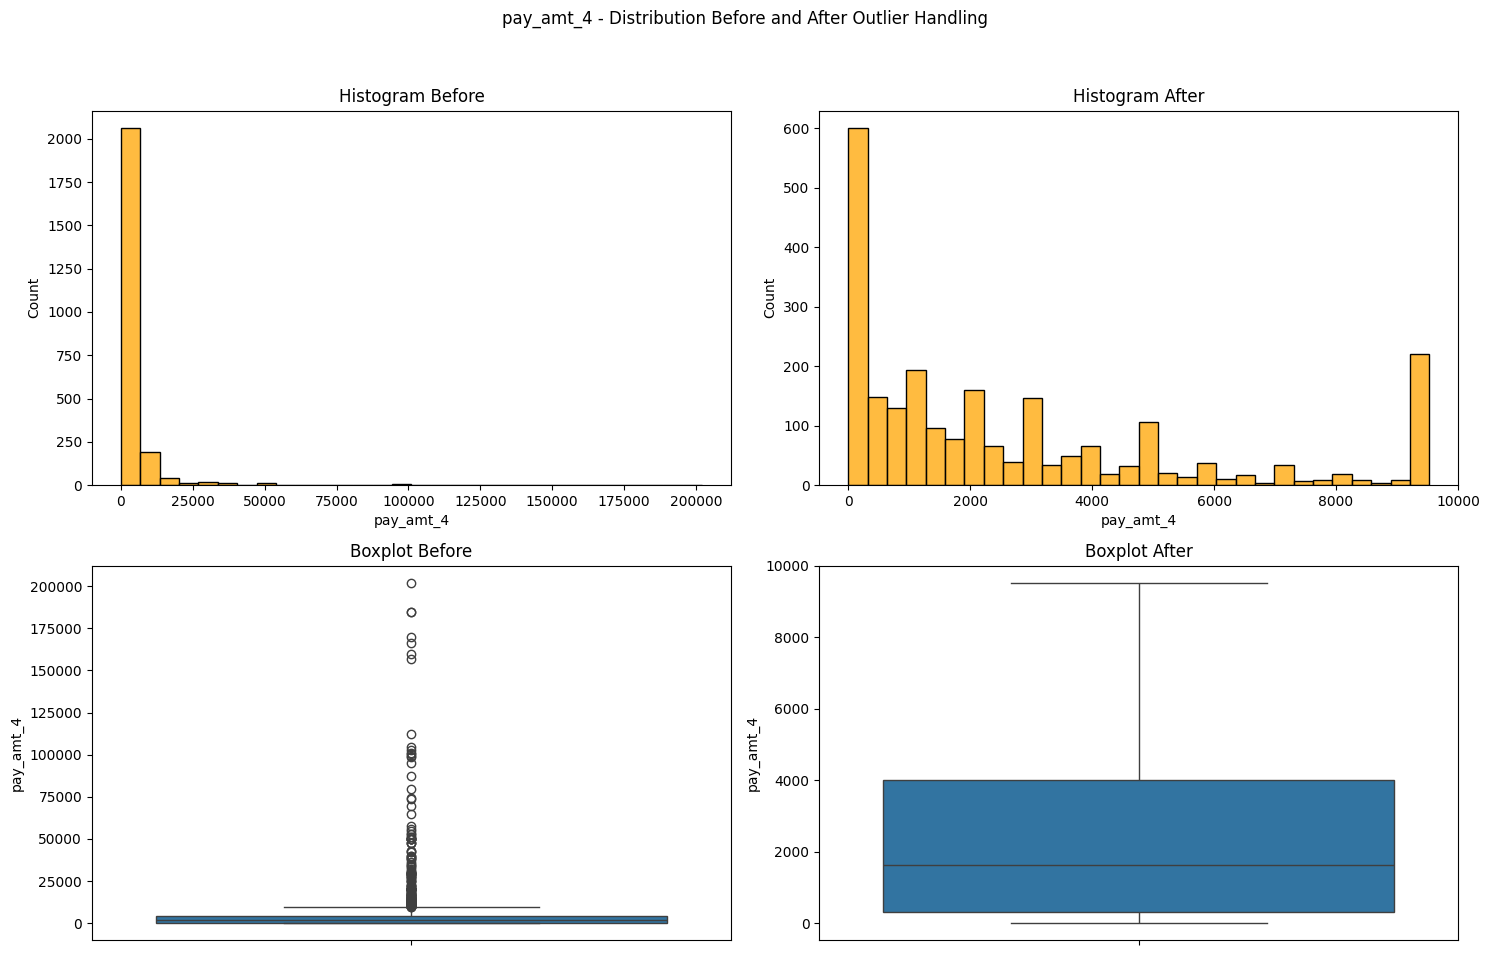

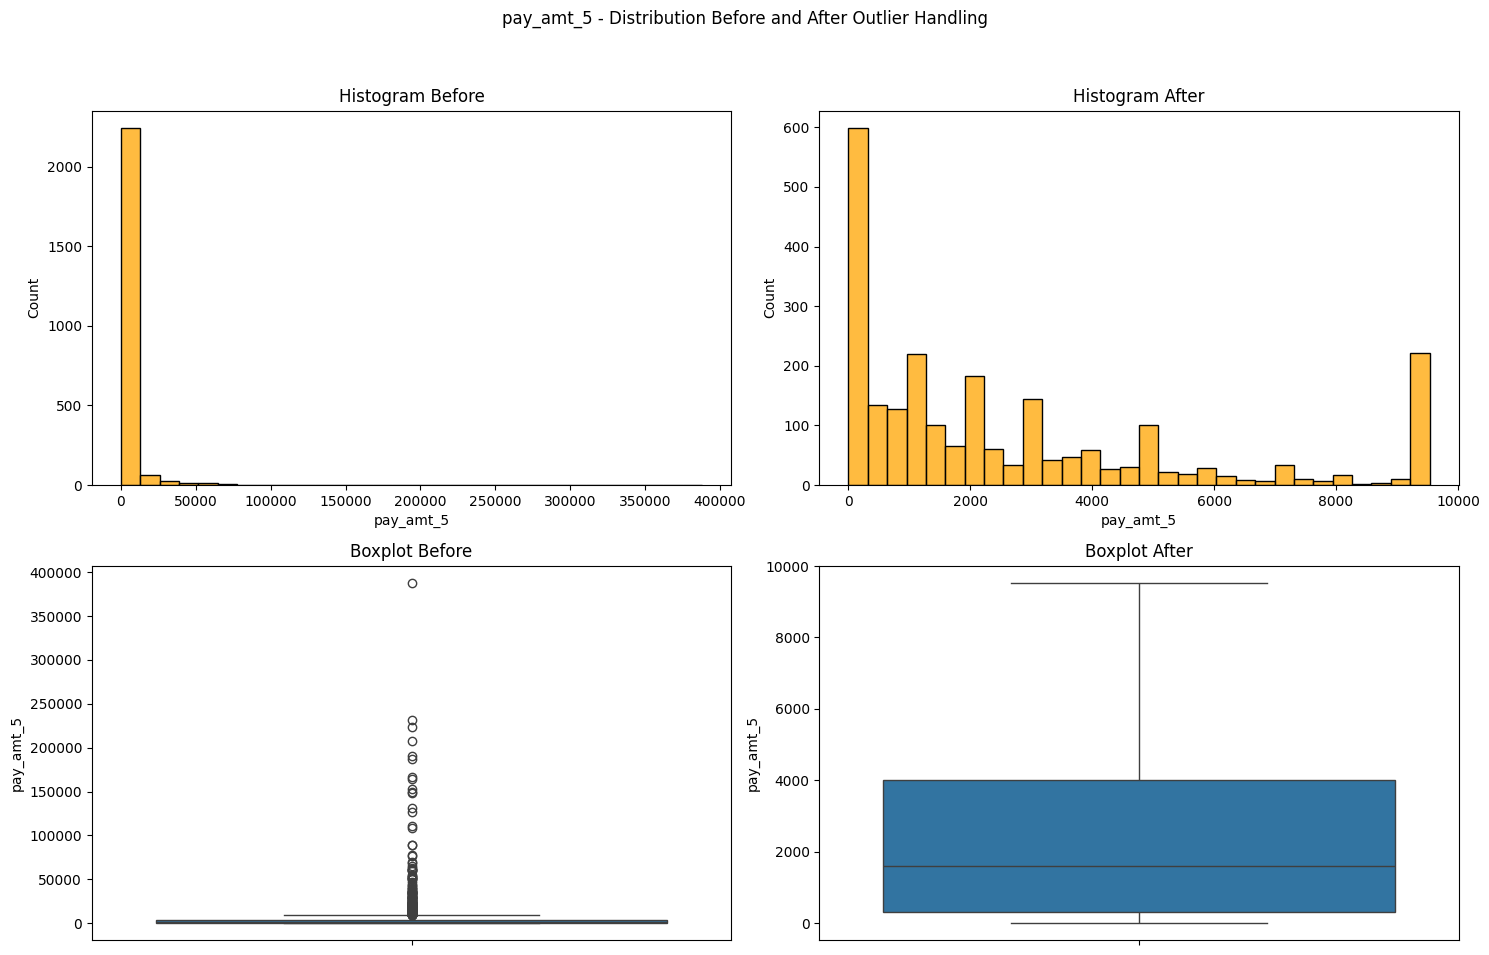

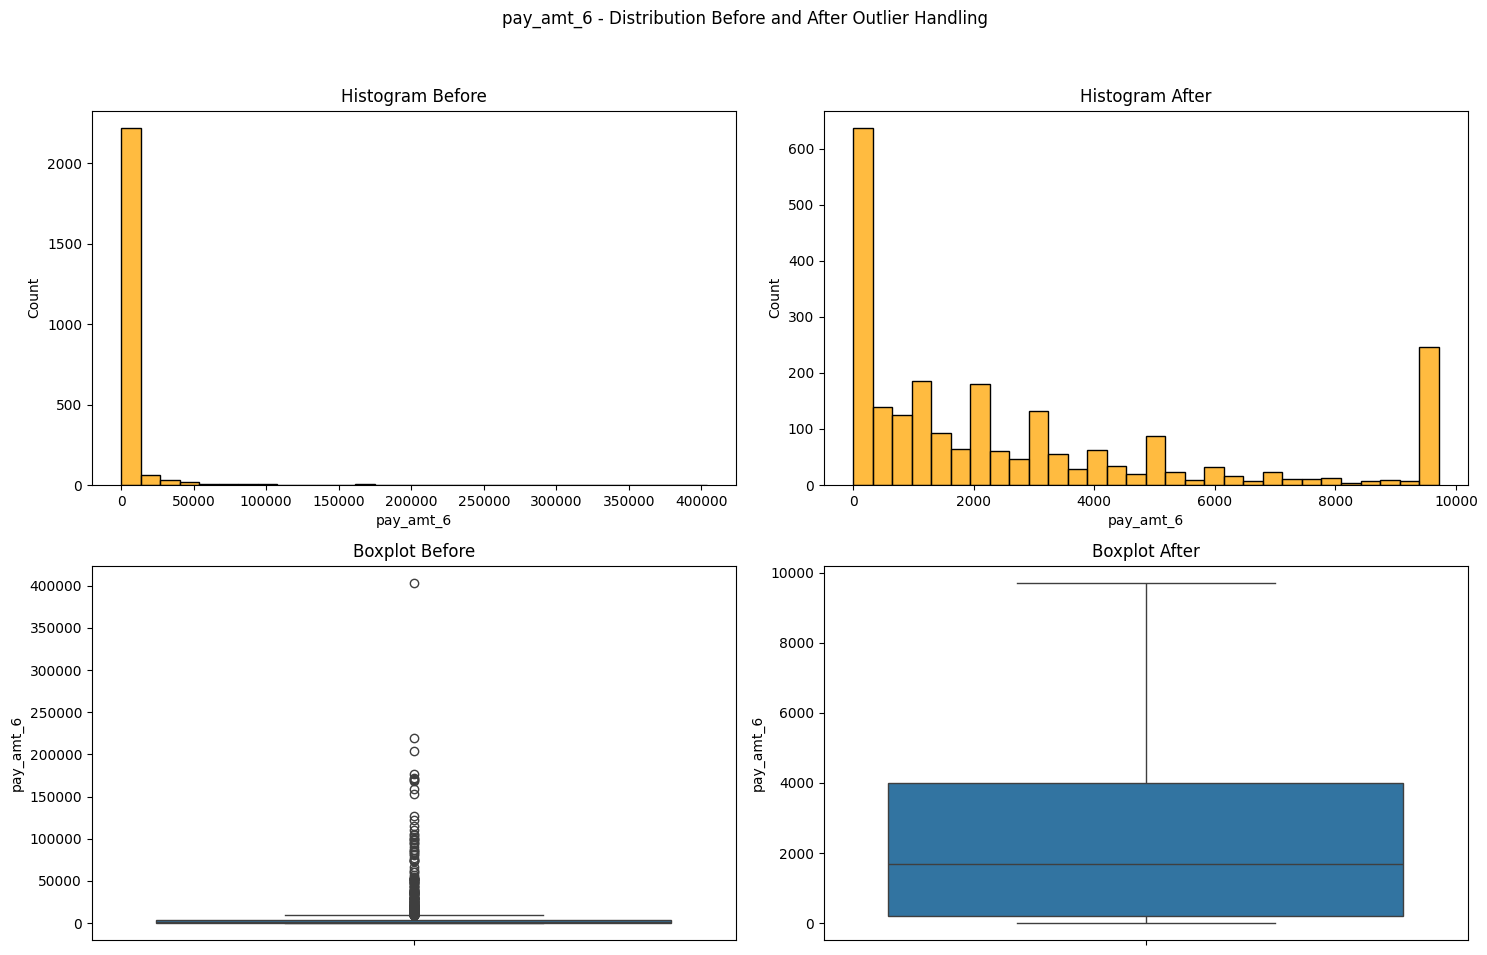

In [26]:
# Membandingkan distribusi sebelum dan setelah penanganan outlier untuk setiap kolom numerik
for num in X_train:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)  



---

### <a id="feature-selection">**D. Feature Selection**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/2620/2620422.png" alt="drawing" width="64" align="center"/></a>

---

- Seleksi fitur dilakukan untuk memilih fitur-fitur yang relevan dan penting dalam  dataset. 
- Tujuannya untuk meningkatkan kinerja model machine learning dengan memfokuskan hanya pada fitur-fitur yang paling relevan dan informatif, serta membuang fitur-fitur yang tidak relevan atau berlebihan.
- Fitur yang tidak relevan dalam model dapat menyebabkan overfitting, peningkatan biaya komputasi, dan pengurangan interpretabilitas model. Seleksi fitur membantu mengatasi masalah-masalah ini <br>
   (Seleksi fitur membantu meningkatkan efisiensi model, mengurangi overfitting, dan memberikan wawasan tentang faktor-faktor paling signifikan yang mempengaruhi variabel target, sehingga menghasilkan model yang lebih baik dan lebih mudah diinterpretasikan)

setelah handling outlier selanjutnya menseleksi fitur-fitur mana kira-kira memiliki relasi dengan variabel price<br>
menggunakan kolom hasil capping outlier, seleksi dilakukan
dengan menentuhkan fitur yang penting atau memiliki pengaruh besar pada target price yang akan diprediksi<br>
seleksi dilakukan pada kolom numerik dan kategori untuk itu data dipisah menjadi kolom kategorikal dan kolom numerikal 
- seleksi dilakukan dengan cara menghitung nilai coefisien korelasi
- seleksi pada kolom kategorikal menggunakan metode kendall <br>
  (dengan nilai coefisien korelasi lebih dari 0.1 berarti menunjukan variabel itu penting)
- seleksi pada kolom numerical menggunakan metode sperman. metode sperman dipakai karena distribusi data skew <br>
  (dengan variabel yang memiliki nilai coefisien korelasi lebih dari 0.1 berarti menunjukan variabel itu penting)

In [27]:
# Menghitung jumlah nilai unik (variansi) di setiap kolom X_train_capped
num_unique_values = X_train_capped.nunique()

# Ambang batas untuk memilih kolom kategorikal berdasarkan jumlah nilai unik
# Sesuaikan ambang batas ini sesuai kebutuhan
unique_value_threshold = 15

# Memisahkan kolom berdasarkan jumlah nilai unik
kategorikal_columns = num_unique_values[num_unique_values <= unique_value_threshold].index.tolist()  # Kolom kategorikal
numerikal_columns = num_unique_values[num_unique_values > unique_value_threshold].index.tolist()  # Kolom numerikal

# Menampilkan kolom kategorikal
print('Kolom Kategorikal (<= {} nilai unik): {}'.format(unique_value_threshold, kategorikal_columns))

# Menampilkan kolom numerikal
print('Kolom Numerikal (> {} nilai unik): {}'.format(unique_value_threshold, numerikal_columns))


Kolom Kategorikal (<= 15 nilai unik): ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Kolom Numerikal (> 15 nilai unik): ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [28]:
# Membagi fitur pelatihan dan pengujian ke dalam kolom numerik dan kategorikal

# Mengambil kolom kategorikal dari X_train_capped
X_train_cat = X_train_capped[kategorikal_columns]  

# Mengambil kolom numerik dari X_train_capped
X_train_num = X_train_capped[numerikal_columns]  

# Mengambil kolom kategorikal dari X_test_capped
X_test_cat = X_test_capped[kategorikal_columns]  

# Mengambil kolom numerik dari X_test_capped
X_test_num = X_test_capped[numerikal_columns]  


In [29]:
# Inisialisasi list untuk menyimpan hasil
interpretation = []  # List untuk menyimpan interpretasi (signifikan atau tidak)
cols = []  # List untuk menyimpan nama kolom
corr = []  # List untuk menyimpan koefisien korelasi
selected_cat_cols = []  # List untuk menyimpan kolom kategorikal yang signifikan
p_values = []  # List untuk menyimpan nilai p

# Ambang batas untuk signifikansi koefisien korelasi
correlation_threshold = 0.1

# Iterasi melalui kolom-kolom kategorikal dan lakukan analisis korelasi Kendall's Tau
for col in X_train_cat.columns:
    corr_coef, p_value = kendalltau(X_train_cat[col], y_train)  # Menghitung koefisien korelasi menggunakan Kendall Tau
    
    cols.append(col)  # Menambahkan nama kolom ke dalam list
    corr.append(corr_coef)
    p_values.append(p_value)
    
    # Menentukan signifikansi berdasarkan nilai absolut koefisien korelasi
    if abs(corr_coef) > correlation_threshold:
        interpretation.append('Signifikan')  # Menandai kolom sebagai signifikan
        selected_cat_cols.append(col)  # Menambahkan kolom signifikan ke dalam list
    else:
        interpretation.append('Tidak Signifikan')  # Menandai kolom sebagai tidak signifikan

# Membuat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Nama Kolom': cols,
    'Koefisien Korelasi': corr,
    'Nilai P': p_values,
    'Korelasi': interpretation
})


,Nama Kolom,Koefisien Korelasi,Nilai P,Korelasi
0,sex,-0.017257,4.008444e-01,Tidak Signifikan
1,education_level,0.061699,1.528055e-03,Tidak Signifikan
2,marital_status,-0.022329,2.738127e-01,Tidak Signifikan
3,pay_0,0.293350,2.203374e-54,Signifikan
4,pay_2,0.231824,8.333877e-34,Signifikan
5,pay_3,0.212308,1.429501e-28,Signifikan
6,pay_4,0.190959,2.649092e-23,Signifikan
7,pay_5,0.192234,1.616947e-23,Signifikan
8,pay_6,0.174221,1.051551e-19,Signifikan


In [30]:
# Inisialisasi list untuk menyimpan hasil
interpretation = []  # List untuk menyimpan interpretasi (signifikan atau tidak)
cols = []  # List untuk menyimpan nama kolom
corr = []  # List untuk menyimpan koefisien korelasi
selected_num_cols = []  # List untuk menyimpan kolom numerik yang signifikan
p_values = []  # List untuk menyimpan nilai p

# Ambang batas untuk signifikansi koefisien korelasi
correlation_threshold = 0.1

for col in X_train_num.columns:
    # Selalu gunakan korelasi Spearman untuk data yang miring
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)  # Menghitung koefisien korelasi menggunakan Spearman
    corr.append(corr_coef)  # Menambahkan koefisien korelasi ke dalam list
    cols.append(col)  # Menambahkan nama kolom ke dalam list
    p_values.append(p_value)
    
    # Memeriksa koefisien korelasi untuk signifikansi
    if abs(corr_coef) > correlation_threshold:
        interpretation.append('Signifikan')  # Menandai kolom sebagai signifikan
        selected_num_cols.append(col)  # Menambahkan kolom signifikan ke dalam list
    else:
        interpretation.append('Tidak Signifikan')  # Menandai kolom sebagai tidak signifikan

# Membuat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Nama Kolom': cols,
    'Koefisien Korelasi': corr,
    'Nilai P': p_values,
    'Korelasi': interpretation
})


,Nama Kolom,Koefisien Korelasi,Nilai P,Korelasi
0,limit_balance,-0.171483,4.172984e-17,Signifikan
1,age,0.014251,4.879359e-01,Tidak Signifikan
2,bill_amt_1,-0.004048,8.438120e-01,Tidak Signifikan
3,bill_amt_2,-0.000125,9.951645e-01,Tidak Signifikan
4,bill_amt_3,0.004031,8.444610e-01,Tidak Signifikan
5,bill_amt_4,0.010346,6.145933e-01,Tidak Signifikan
6,bill_amt_5,0.012225,5.518477e-01,Tidak Signifikan
7,bill_amt_6,0.018720,3.622350e-01,Tidak Signifikan
8,pay_amt_1,-0.139348,9.427855e-12,Signifikan
9,pay_amt_2,-0.139497,8.957838e-12,Signifikan


In [31]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_6']


- sesuai dengan fitur seleksi variabel yang memiliki  nilai coefisien korelasi dibawah 0.1 dianggap tidak penting dan tidak digunakan pada proses lebih lanjut
- berdasarkan hasil fitur seleksi didapatkan variabel penting yang memiliki pengaruh terhadapah default_payment_next_month
- variabel ini adalah variabel kategorikal yaitu: pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 
- dan variabel numerikal yaitu dlimit_balance, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_6
- fitur-fitur penting ini yang akan diproses lebih lanjut


In [32]:
# Updating Numerical and Categorical Columns
X_train_categorical = X_train_cat[selected_cat_cols]
X_train_numerical = X_train_num[selected_num_cols]

X_test_categorical = X_test_cat[selected_cat_cols]
X_test_numerical = X_test_num[selected_num_cols]


In [33]:
# Show first five data from the updated X_train
X_train_categorical.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
1829,3.0,2.0,2.0,2.0,2.0,2.0
179,0.0,0.0,0.0,0.0,0.0,0.0
2319,0.0,0.0,-1.0,-1.0,-1.0,-2.0
1750,0.0,0.0,0.0,2.0,2.0,0.0
2837,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0


In [34]:
# Show first five data from the updated X_train
X_train_numerical.head()

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
1829,220000.0,0.0,0.0,0.0,0.0,0.0
179,180000.0,5000.0,3371.0,6940.0,2800.0,2000.0
2319,360000.0,0.0,1150.0,1174.0,0.0,0.0
1750,120000.0,3458.0,6300.0,3000.0,0.0,2300.0
2837,180000.0,0.0,0.0,0.0,0.0,0.0


### E. Feature Encoding

saat diawal tadi dilakukan data loading telah diketahui dataset sudah dalam bentuk encoding pada fitur kategoricalnya sehigga tidak perlu lagi dilakukan encoding 

### F. Feature Scaling

- sebelum melatih algoritma machine learning, dilakukan Scaling fitur 
- scaling fitur penting dilakukan karena pada data terdapat fitur dengan rentang nilai yang lebih besar yang akan mendominasi fitur dengan rentang nilai yang lebih kecil
- itulah sebabnya fitur scaling digunakan untuk menormalisasi rentang nilai variabel independen.
- jadi Scaling dilakukan untuk mengatur rentang nilai fitur dalam skala yang serupa

- setelah seleksi fitur didapat variabel numerik.
- karena dataset memiliki distribusi skew maka minmax scaler dipilih sebagai metode scaling 

In [35]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit_transform untuk X_train, transform untuk X_test
X_train_num_scaled = scaler.fit_transform(X_train_numerical)
X_test_num_scaled = scaler.transform(X_test_numerical)

X_train_num_scaled  # Menampilkan hasil scaling untuk X_train_numerical


array([[4.28571429e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.46938776e-01, 4.47797954e-01, 3.06454545e-01, 6.71894666e-01,
        2.93862986e-01, 2.05930807e-01],
       [7.14285714e-01, 0.00000000e+00, 1.04545455e-01, 1.13660567e-01,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [2.04081633e-02, 1.69804984e-01, 1.28818182e-01, 1.16758641e-01,
        2.98061029e-02, 5.08340198e-01],
       [8.16326531e-02, 0.00000000e+00, 2.85545455e-01, 1.93629587e-04,
        0.00000000e+00, 9.32866557e-02],
       [4.08163265e-02, 9.42435573e-01, 4.35454545e-01, 4.58514861e-01,
        1.00000000e+00, 1.00000000e+00]])

In [36]:
# Menggabungkan X_train_categorical dan X_train_num_scaled
X_train_final = np.concatenate([X_train_categorical, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_categorical, X_test_num_scaled], axis=1)

# Mendapatkan nama kolom
column_names =  list(X_train_categorical) + list(X_train_numerical.columns)

# Membuat DataFrames dengan nama kolom
X_train_final = pd.DataFrame(X_train_final, columns=column_names)
X_test_final = pd.DataFrame(X_test_final, columns=column_names)

In [37]:
X_train_final

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_6
0,3.0,2.0,2.0,2.0,2.0,2.0,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.346939,0.447798,0.306455,0.671895,0.293863,0.205931
2,0.0,0.0,-1.0,-1.0,-1.0,-2.0,0.714286,0.000000,0.104545,0.113661,0.000000,0.000000
3,0.0,0.0,0.0,2.0,2.0,0.0,0.224490,0.309697,0.572727,0.290444,0.000000,0.236820
4,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,0.346939,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.0,0.0,0.0,0.0,0.0,0.0,0.612245,0.299129,0.397273,0.387259,0.524755,0.387253
2367,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.693878,0.545239,1.000000,1.000000,1.000000,0.478789
2368,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.169805,0.128818,0.116759,0.029806,0.508340
2369,-1.0,2.0,-1.0,0.0,0.0,-1.0,0.081633,0.000000,0.285545,0.000194,0.000000,0.093287



---

## <a id="model-definition">**6. Model Definition**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/9422/9422881.png" alt="drawing" width="64" align="center"/></a>

---

- akan dilakukan uji coba pada 3 model, yaitu logistic regresion , K-Nearesst Neighbors dan Support Vector Machine 
- hasil prediksi yang paling bagus diantara 3 model maka model itulah yang akan dipakai untuk memprediksi variabel default_payment_next_month

### A. Model Logistic Regresion

model logistic regresion yang diuji coba menggunakan hyperparameter default berdasarkan defaultnya scikit-learn yaitu :
- penalty = l2
- c = 1.0 

In [38]:
# Melatih model Logistic Regression
logreg = LogisticRegression()

### B. Model K-Nearest Neighbors

model knn yang diuji coba menggunakan hyperparameter default berdasarkan defaultnya scikit-learn yaitu :
- k = 5
- metric = minkowski 
- p = 1 , 2 

In [39]:
# Pelatihan menggunakan KNN
knn = KNeighborsClassifier()

### C. Model Support Vector Machine

model svm yang diuji coba menggunakan hyperparameter default berdasarkan defaultnya scikit-learn yaitu :
- kernel = rbf
- c (reguralization)= 1.0 
- gamma = scale

In [40]:
svm = SVC(probability=True)


---

## <a id="model-training">**7. Model Training**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/2103/2103652.png" alt="drawing" width="64" align="center"/></a>

---

In [41]:
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [42]:
# Prediksi menggunakan model Logistic Regression
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)


In [43]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

In [44]:
# Prediksi Model
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

In [45]:
svm.fit(X_train_final, y_train)

SVC(probability=True)

In [46]:
# Prediksi Model
y_pred_train_svm = knn.predict(X_train_final)
y_pred_test_svm = knn.predict(X_test_final)


---

## <a id="model-evaluation">**8. Model Evaluation**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/3201/3201494.png" alt="drawing" width="64" align="center"/></a>

---

berdasarkan data loading di awal diketahui dataset inbalance sehingga metric akurasi tidak dipakai<br>
analisis evaluasi akan difokuskan pada recall<br>
Kelas 0: No (tidak akan gagal bayar bulan depan) — ini adalah kelas negatif.<br>
Kelas 1: Yes (akan gagal bayar bulan depan) — ini adalah kelas positif.

### A. Classification Report


Fokus pada recall daripada metrik lainnya, seperti precision atau accuracy, dalam kasus prediksi default pembayaran bulan depan (default payment next month) adalah pilihan yang tepat karena alasan berikut:<br>

Imbalance Kelas:<br>
Dalam dataset yang memprediksi default payment next month, kemungkinan besar akan ada ketidakseimbangan kelas di mana jumlah kasus yang tidak default (kelas 0) jauh lebih banyak daripada kasus yang default (kelas 1). Dalam situasi seperti ini:

- Accuracy mungkin menjadi tinggi karena model cenderung memprediksi mayoritas kelas (kelas 0), tetapi ini tidak mencerminkan kinerja model yang baik pada kelas minoritas (kelas 1).
- Precision hanya mempertimbangkan prediksi yang benar di antara prediksi positif, tetapi tidak memperhitungkan berapa banyak yang terlewatkan dari kelas positif (false negatives).

Kritisnya Deteksi Kasus Positif (Default):<br>
- Ketika tujuan prediksi adalah untuk mengidentifikasi pelanggan yang akan gagal bayar bulan depan, sangat penting untuk menangkap sebanyak mungkin kasus default (kelas 1):

- Recall untuk kelas 1 (Yes) mengukur seberapa baik model dalam menemukan semua kasus default yang sebenarnya (true positives). Ini berarti recall yang tinggi memastikan bahwa sedikit kasus default yang terlewatkan.

- Dampak False Negatives:<br>
False negatives (kasus default yang diprediksi sebagai tidak default) memiliki konsekuensi yang signifikan:

Mengabaikan pelanggan yang sebenarnya akan gagal bayar bisa menyebabkan kerugian finansial bagi lembaga keuangan, karena mereka tidak dapat mengambil tindakan pencegahan atau mitigasi risiko.

#### a. Logistic  

In [47]:
# Evaluasi Model - Set Pelatihan logistic
print("logistic train set:")
print(classification_report(y_train, y_pred_train_logreg))

# Evaluasi Model - Set Pengujian logistic
print("logistic test set:")
print(classification_report(y_test, y_pred_test_logreg))

logistic train set:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1861
           1       0.73      0.29      0.41       510

    accuracy                           0.82      2371
   macro avg       0.78      0.63      0.66      2371
weighted avg       0.81      0.82      0.79      2371

logistic test set:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       468
           1       0.73      0.28      0.40       125

    accuracy                           0.83       593
   macro avg       0.78      0.63      0.65       593
weighted avg       0.81      0.83      0.79       593



#### b. KNN 

In [48]:
# Evaluasi Model - Set Pelatihan knn
print("knn train set:")
print(classification_report(y_train, y_pred_train_knn))

# Evaluasi Model - Set Pengujian knn
print("knn test set:")
print(classification_report(y_test, y_pred_test_knn))

knn train set:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1861
           1       0.72      0.53      0.61       510

    accuracy                           0.85      2371
   macro avg       0.80      0.73      0.76      2371
weighted avg       0.84      0.85      0.85      2371

knn test set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       468
           1       0.54      0.42      0.47       125

    accuracy                           0.80       593
   macro avg       0.70      0.66      0.67       593
weighted avg       0.79      0.80      0.79       593



#### c. SVM 

In [49]:
# Evaluasi Model - Set Pelatihan svm

print("svm train set:")
print(classification_report(y_train, y_pred_train_svm))

# Evaluasi Model - Set Pengujian svm
print("svm test set:")
print(classification_report(y_test, y_pred_test_svm))

svm train set:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1861
           1       0.72      0.53      0.61       510

    accuracy                           0.85      2371
   macro avg       0.80      0.73      0.76      2371
weighted avg       0.84      0.85      0.85      2371

svm test set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       468
           1       0.54      0.42      0.47       125

    accuracy                           0.80       593
   macro avg       0.70      0.66      0.67       593
weighted avg       0.79      0.80      0.79       593



Kesimpulan evaluasi:
Berdasarkan nilai recall untuk kelas 1 (yes) pada set train dan test:

- Logistic Regression memiliki recall terendah untuk kelas 1 (yes).
- KNN dan SVM memiliki nilai recall yang sama baik di set train maupun set test.
Untuk memilih model dengan hasil recall terbaik, saya fokus pada nilai recall di set test karena lebih mencerminkan performa model pada data yang tidak terlihat.

Analisis dari evaluasi<br>
Logistic Regression: Memiliki nilai recall yang sangat rendah untuk kelas 1 baik pada train set maupun test set, yaitu sekitar 0.28-0.29. <br>
KNN dan SVM: Kedua model ini memiliki performa yang sama dengan nilai recall 0.53 pada train set dan 0.42 pada test set untuk kelas 1.

Pemilihan SVM sebagai fokus utama untuk dataset ini karena:<br>
Karakteristik Dataset:<br>

- Data yang Tidak Seimbang (Imbalanced Data): SVM dapat menangani data yang tidak seimbang dengan baik karena dapat menyesuaikan bobot (weight) pada setiap kelas dengan menggunakan parameter class_weight atau dengan menyesuaikan threshold keputusan.
- Outliers dan Distribusi Skew: SVM memiliki sifat toleransi terhadap outliers karena fungsi tujuannya adalah untuk menemukan hyperplane yang optimal untuk memisahkan kelas-kelas, bukan hanya berdasarkan mean atau median seperti dalam regresi logistik.

Kapasitas Model:

- SVM mampu menangani ruang fitur (feature space) yang tinggi (high-dimensional feature space) dengan baik, bahkan ketika jumlah fitur (features) jauh lebih besar dari jumlah sampel (samples).
- SVM memiliki kemampuan untuk menangani masalah kompleksitas model yang tinggi dengan menggunakan kernel untuk memetakan data ke ruang fitur yang lebih tinggi.

Performa pada Data Minoritas:

- Dalam kasus ini, recall untuk kelas minoritas (default payment = 1) menjadi fokus utama. SVM sering kali dapat memberikan hasil yang lebih baik dalam mendeteksi kelas minoritas karena penggunaan fungsi decision boundary (seperti hyperplane) yang bisa menyesuaikan data secara lebih baik dibandingkan dengan model yang lebih sederhana seperti regresi logistik atau KNN.
- Dengan tuning yang tepat, SVM dapat menghasilkan margin decision yang optimal untuk memisahkan kelas-kelas, sehingga dapat meningkatkan recall untuk kelas minoritas.

Kemampuan Generalisasi:

SVM cenderung memiliki kemampuan generalisasi yang baik setelah proses tuning hyperparameter yang tepat. Ini bermanfaat dalam situasi di mana saya ingin model dapat diterapkan pada data baru dengan performa yang konsisten.

Langkah Selanjutnya adalah dengan Random Search Hyperparameter Tuning untuk model svm untuk meningkatkan performa model lebih lanjut.

### B. Confusion Matrix

In [50]:
# Confusion Matrix - Train Set

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train_svm)

print('Confusion Matrix train svm : \n', cm_train)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test_svm)

print('Confusion Matrix test svm : \n', cm_test)


Confusion Matrix train svm : 
 [[1757  104]
 [ 242  268]]
Confusion Matrix test svm : 
 [[424  44]
 [ 73  52]]


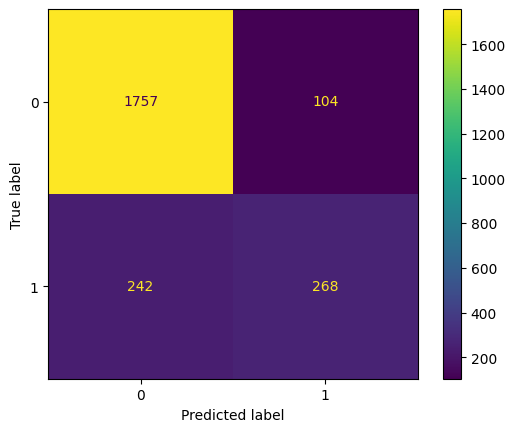

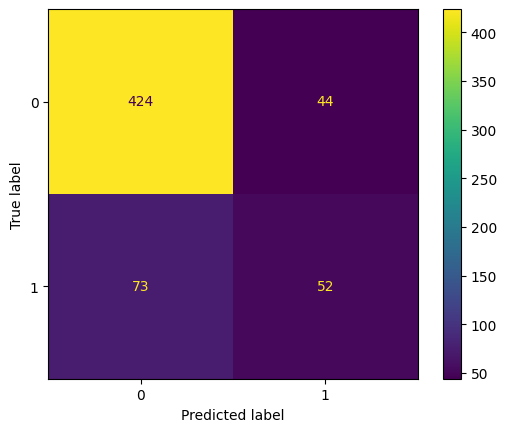

In [51]:
# Confusion Matrix - Set Pelatihan model svm

cm_train_svm = confusion_matrix(y_train, y_pred_train_svm)

ConfusionMatrixDisplay(cm_train_svm).plot()

# Confusion Matrix - Set Pengujian svm

cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)

ConfusionMatrixDisplay(cm_test_svm).plot()

Confusion Matrix untuk Test train SVM

- True Positive (TP): 268 (prediksi "ya" yang benar)
- True Negative (TN): 1757 (prediksi "tidak" yang benar)
- False Positive (FP): 104 (prediksi "ya" padahal seharusnya "tidak")
- False Negative (FN): 242 (prediksi "tidak" padahal seharusnya "ya")

Confusion Matrix untuk Test Set SVM

- True Positive (TP): 52 (prediksi "ya" yang benar)
- True Negative (TN): 424 (prediksi "tidak" yang benar)
- False Positive (FP): 44 (prediksi "ya" padahal seharusnya "tidak")
- False Negative (FN): 73 (prediksi "tidak" padahal seharusnya "ya")

### C. ROC-AUC

In [52]:
# Dapatkan FPR, TPR, dan Skor AUC dari model svm

y_pred_proba_svm = svm.predict_proba(X_test_final)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print('AUC Score : ', auc_svm)

AUC Score :  0.7436239316239316


In [53]:
# Dapatkan FPR, TPR, dan Skor AUC dari model svm

pd.DataFrame({'FPR': fpr_svm, 'TPR': tpr_svm})

,FPR,TPR
0,0.000000,0.000
1,0.002137,0.000
2,0.004274,0.000
3,0.004274,0.104
4,0.006410,0.104
...,...,...
157,0.991453,0.984
158,0.991453,0.992
159,0.995726,0.992
160,0.995726,1.000


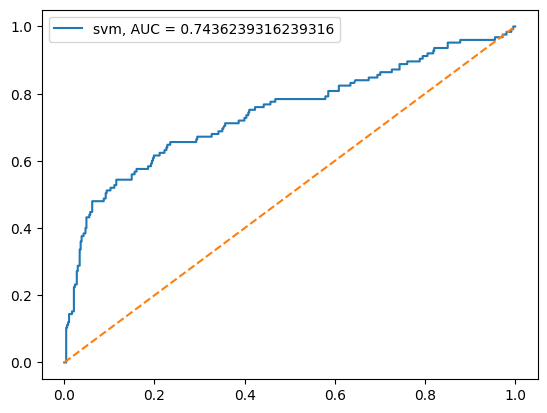

In [54]:
# Plot Kurva ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_svm, tpr_svm, label='svm, AUC = ' + str(auc_svm))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)


---

## <a id="hyperparameter-tuning">**9. Hyperparameter Tuning**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/9304/9304663.png" alt="drawing" width="64" align="center"/></a>

---

In [55]:
# Define hyperparameters and their ranges for SVM
param_dist_svm = {
    'C': uniform(loc=0, scale=4),  # Rentang nilai C (0 sampai 4)
    'kernel': ['linear', 'poly', 'sigmoid'],  # Jenis kernel yang digunakan
    'gamma': [ 'auto'],  # Skema skala gamma
    'degree': randint(1, 5),  # Rentang derajat polinomial untuk kernel 'poly'
}

# Initialize SVM model
svm = SVC()

# Perform Randomized Search
svm_randomcv = RandomizedSearchCV(estimator=svm,
                                  param_distributions=param_dist_svm,
                                  n_iter=50,
                                  cv=5,
                                  random_state=42,
                                  scoring='recall',
                                  n_jobs=-1)

# Fit the model
svm_randomcv.fit(X_train_final, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30c208aa0>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30ae4ae70>,
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='recall')

In [56]:
cv_results_df = pd.DataFrame(svm_randomcv.cv_results_)
cv_results_df.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066143,0.007085,0.027277,0.007377,1.49816,1,auto,sigmoid,"{'C': 1.49816047538945, 'degree': 1, 'gamma': ...",0.362745,0.460784,0.352941,0.362745,0.362745,0.380392,0.040375,29
1,0.243606,0.059390,0.014919,0.005273,2.927976,1,auto,linear,"{'C': 2.9279757672456204, 'degree': 1, 'gamma'...",0.392157,0.411765,0.500000,0.450980,0.500000,0.450980,0.044281,11
2,0.069457,0.004583,0.011123,0.003391,0.624075,3,auto,sigmoid,"{'C': 0.6240745617697461, 'degree': 3, 'gamma'...",0.362745,0.431373,0.313725,0.323529,0.362745,0.358824,0.041409,32
3,0.069447,0.011020,0.015255,0.006379,0.232334,4,auto,linear,"{'C': 0.23233444867279784, 'degree': 4, 'gamma...",0.392157,0.411765,0.450980,0.460784,0.500000,0.443137,0.037920,12
4,0.060143,0.011870,0.019683,0.007551,2.40446,4,auto,sigmoid,"{'C': 2.404460046972835, 'degree': 4, 'gamma':...",0.382353,0.470588,0.352941,0.362745,0.362745,0.386275,0.043226,22
5,0.054958,0.012563,0.015102,0.008031,0.082338,2,auto,poly,"{'C': 0.08233797718320979, 'degree': 2, 'gamma...",0.117647,0.019608,0.078431,0.068627,0.088235,0.074510,0.031979,50
6,0.130058,0.008725,0.014323,0.005596,0.849356,4,auto,linear,"{'C': 0.8493564427131046, 'degree': 4, 'gamma'...",0.392157,0.411765,0.450980,0.450980,0.500000,0.441176,0.037203,19
7,0.099297,0.012601,0.016259,0.003564,2.469926,2,auto,poly,"{'C': 2.469926038510866, 'degree': 2, 'gamma':...",0.303922,0.294118,0.313725,0.333333,0.343137,0.317647,0.018184,38
8,0.057309,0.011757,0.011982,0.002454,0.028265,1,auto,linear,"{'C': 0.028265220878869624, 'degree': 1, 'gamm...",0.392157,0.254902,0.392157,0.372549,0.372549,0.356863,0.051729,35
9,0.191966,0.041681,0.012442,0.004807,2.099099,3,auto,poly,"{'C': 2.0990986410335566, 'degree': 3, 'gamma'...",0.313725,0.225490,0.313725,0.274510,0.303922,0.286275,0.033620,46


In [57]:
print("Best Parameters:", svm_randomcv.best_params_)

print("Recall hasil random search:", svm_randomcv.best_score_)
# Get Best Estimator
best_svm_model = svm_randomcv.best_estimator_

best_svm_model

Best Parameters: {'C': 2.733054075301833, 'degree': 4, 'gamma': 'auto', 'kernel': 'linear'}
Recall hasil random search: 0.45294117647058824


SVC(C=2.733054075301833, degree=4, gamma='auto', kernel='linear')

didapatkan hasil parameter terbaik 

In [58]:
# Evaluasi performa model

print("svm Default Performance:")
print(classification_report(y_test, y_pred_test_knn))


# svm_randomcv adalah model terbaik setelah random search
y_pred_randomcv = svm_randomcv.best_estimator_.predict(X_test_final)

# Evaluasi performa model setelah random search
print("svm Tuned Performance:")
print(classification_report(y_test, y_pred_randomcv))

print("recall default:", recall_score(y_test, y_pred_test_knn))
print("recall tuned:", recall_score(y_test, y_pred_randomcv))


svm Default Performance:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       468
           1       0.54      0.42      0.47       125

    accuracy                           0.80       593
   macro avg       0.70      0.66      0.67       593
weighted avg       0.79      0.80      0.79       593

svm Tuned Performance:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       468
           1       0.63      0.46      0.53       125

    accuracy                           0.83       593
   macro avg       0.75      0.70      0.72       593
weighted avg       0.82      0.83      0.82       593

recall default: 0.416
recall tuned: 0.464


Analisis tuning: <br>

Recall untuk kelas 1 meningkat dari 0.42 menjadi 0.46, menunjukkan bahwa setelah penyesuaian, model lebih baik dalam menangkap kasus default.<br>



---

## <a id="model-saving">**10. Model Saving**</a><a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/1004/1004755.png" alt="drawing" width="64" align="center"/></a>


---

In [59]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(selected_cat_cols, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model.pkl', 'wb') as file_4:
  pickle.dump(svm_randomcv, file_4)